# This script will import and report simulations, collect parameter values, and plot versus different parameters. 

## Written by Max Ferrin, modifications Matt Akamatsu

## for analysis of actin in simulations, use "plot_actin.ipynb"

In [81]:
import IPython
from tabulate import tabulate

class OrgFormatter(IPython.core.formatters.BaseFormatter):
    def __call__(self, obj):
        try:
            return tabulate(obj, headers='keys',
                            tablefmt='orgtbl', showindex='always')
        except:
            return None

ip = get_ipython()
ip.display_formatter.formatters['text/org'] = OrgFormatter()

import math
import numpy as np
import pandas as pd
import os
import shutil
import subprocess
from subprocess import Popen
import datetime
import matplotlib.pyplot as plt  # plotting
plt.style.use('seaborn-colorblind') # set plot style
plt.cool()                          # heatmap color scheme
%matplotlib inline


import seaborn as sns  # nicer plotting
sns.set_style('whitegrid')  # set plot style

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 



from decimal import Decimal

from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from scipy.stats import binned_statistic_2d

timestep = 0.1
report = 'no'
report_arp ='no'
report_clusters = 'no'
replace_movies = 'no'
save_figures = 'yes'

process_hip1r = 'yes'
process_forces = 'no'
process_ends = 'yes'

process_hip1r_bound = 'yes'
recalibrate_to_bud = 'yes'

remake_final_hip1r_bound = False

save_dataframes = 'no'
load_dataframes = 'yes'



In [82]:
working_dir = '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/parameter_sweeps_maxReporting/'
# working_dir = os.getcwd()+'/'
# report_loc = '/global/home/users/ferrinm/cytosim_dblab/cytosim/bin/report'
report_loc = '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/bin/report'



In [83]:
os.chdir(working_dir)
if os.path.isdir('figures') == False:
    os.mkdir('figures')

now = datetime.datetime.now()
date = now.strftime('%Y%m%d')
pref = date

output_dirs = []
config_dirs = []

for d in next(os.walk('simulations/'))[1]:
    for f in os.listdir('simulations/'+d):
        if f.endswith('.cym'):
            config_dirs.append(d)
            break
    for sd in next(os.walk('simulations/'+d))[1]:
        if sd.startswith('output') or sd.startswith('run'):
            output_dirs.append(d)
            break

# Sort alphabetically 

indecies = range(len(output_dirs))

output_dirs.sort()
config_dirs.sort()

all_dirs={}

all_dirs['output'] = output_dirs
all_dirs['config'] = config_dirs

all_dirs_df = pd.DataFrame(data = all_dirs)

all_dirs_df

# print(output_dirs)
# print(config_dirs)

output  \
0                        endocytosis2_sims_output   
1                   endocytosis_cut_capped_output   
2                          endocytosis_cut_output   
3                              endocytosis_output   
4                hip1r_sphere_high_tension_output   
5                 hip1r_sphere_low_tension_output   
6                             hip1r_sphere_output   
7                    varyArpNb_bindingRate_output   
8                               varyCp_Lp1_output   
9                                varyCp_Lp_output   
10                        varyHip1RoffRate_output   
11                       varyViscosityBud1_output   
12                        varyViscosityBud_output   
13                   varyViscosityStepping_output   
14                           varyViscosity_output   
15                            vary_ArpNb_2_output   
16                            vary_ArpNb_3_output   
17                   vary_Arp_disk_density_output   
18                    vary_Arp_disk_radius_output   
19                vary_Arp_nucleation_rate_output   
20  vary_Arp_nucleation_spring_stiffness_2_output   
21  vary_Arp_nucleation_spring_stiffness_3_output   
22    vary_Arp_nucleation_spring_stiffness_output   
23                                 vary_Cp_output   
24                                vary_Lp3_output   
25                                 vary_Lp_output   
26                 vary_actinConfinement_2_output   
27                   vary_actinConfinement_output   
28                 vary_actin_segmentation_output   
29                      vary_hip1r_density_output   
30                   vary_nucleator_number_output   
31           vary_nucleator_number_rate_2__output   
32              vary_nucleator_number_rate_output   
33                   vary_spring_stiffness_output   
34                         vary_stallForce_output   
35                         vary_timeStep_2_output   
36                           vary_timeStep_output   

                                    config  
0                              endocytosis  
1                        endocytosis2_sims  
2                          endocytosis_cut  
3                   endocytosis_cut_capped  
4                             hip1r_sphere  
5                hip1r_sphere_high_tension  
6                 hip1r_sphere_low_tension  
7                    varyArpNb_bindingRate  
8                                varyCp_Lp  
9                               varyCp_Lp1  
10                        varyHip1RoffRate  
11                           varyViscosity  
12                        varyViscosityBud  
13                       varyViscosityBud1  
14                   varyViscosityStepping  
15                            vary_ArpNb_2  
16                            vary_ArpNb_3  
17                   vary_Arp_disk_density  
18                    vary_Arp_disk_radius  
19                vary_Arp_nucleation_rate  
20    vary_Arp_nucleation_spring_stiffness  
21  vary_Arp_nucleation_spring_stiffness_2  
22  vary_Arp_nucleation_spring_stiffness_3  
23                                 vary_Cp  
24                                 vary_Lp  
25                                vary_Lp3  
26                   vary_actinConfinement  
27                 vary_actinConfinement_2  
28                 vary_actin_segmentation  
29                      vary_hip1r_density  
30                   vary_nucleator_number  
31              vary_nucleator_number_rate  
32           vary_nucleator_number_rate_2_  
33                   vary_spring_stiffness  
34                         vary_stallForce  
35                           vary_timeStep  
36                         vary_timeStep_2

# Choose which directories to report, plot

In [74]:
# replace index with which outputs you want to work with (starting at 0)

# for small nbs

# output_dirs = [output_dirs[33]]
# config_dirs = [config_dirs[33]]

# output_dirs = [output_dirs[15], output_dirs[16]]
# config_dirs = [config_dirs[16], config_dirs[15]]

# output_dirs = [output_dirs[4], output_dirs[5], output_dirs[6]]
# config_dirs = [config_dirs[4], config_dirs[5], config_dirs[6]]

print(output_dirs, config_dirs)

['vary_ArpNb_2_output', 'vary_ArpNb_3_output'] ['vary_ArpNb_3', 'vary_ArpNb_2']


In [75]:
# make dataframes folder if doesn' exist


os.chdir(working_dir+'simulations/'+output_dirs[0])

if os.path.isdir('dataframes') == False:
    os.mkdir('dataframes')

save_dir = working_dir+'simulations/'+output_dirs[0]+'/dataframes/'

In [76]:
# plotting functions

## plot of mean and std of a value over time, grouped by parameter value.

# input is a grouped value, e.g. ends_grouped['radial_orientation'].mean()

# include 'reverse' as fourth input argument if you want to reverse the order of the legend

def plot_vs_time_by_parameter(cur_grouped_mean, cur_grouped_std, label, *argv):

    num_traces = len(solid_config_groups)
    colors = plt.cm.jet(np.linspace(0, 1, len(solid_config_groups)+1))

    fig = plt.figure(figsize=(5,4))


    commonaxis = plt.axes(frameon=True)

    commonaxis.set( ylabel = label)

    plot_no = 1
    plot_max = np.max(cur_grouped_mean + cur_grouped_std)
    plot_min = np.min(cur_grouped_mean - cur_grouped_std)

    values = []
    ax = plt.subplot(1,1,1)
    for name, group in solid_config_groups:

        color = colors[plot_no]

        x = cur_grouped_mean.loc[name].reset_index()['time']

        #         toggle for whether it's still a df or not
        if isinstance(cur_grouped_mean.loc[name], pd.DataFrame):
            y = cur_grouped_mean.loc[name].iloc[:,0] 
            std = cur_grouped_std.loc[name].iloc[:,0]
        else:
            y = cur_grouped_mean.loc[name]
            std = cur_grouped_std.loc[name]

        # shaded bar plot

        
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        ax.plot(x,y,c=color)
        ax.fill_between(x,np.array(y)-np.array(std), np.array(y)+np.array(std), alpha=0.15,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) #,linestyle='dashdot'

        title = ''
        values.append(name)    
        plot_no += 1

        
    ax.tick_params(reset=True, color='black', direction='in', length=4)
    ax.grid(False)
    
    plt.xlabel('Time (s)')
    plt.ylabel(label)
    
    # to reverse order of legend:

    if 'reverse' in argv:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(reversed(handles), reversed(values), loc='center left', bbox_to_anchor=(1, 0.5))

    # not reversed legend:
    else:
        ax.legend(values, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()

def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

def log_10_product_decimal(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
#     for decimal value not integer shown
    return '%.2g' % (x)
    
def plot_means_by_parameter(param_list_current,metric_means,metric_stds,log_criterion,ylabel):

    xaxis_log = log_criterion
    x = param_list_current # for now, get from the larger list later
    y = metric_means
    std = metric_stds

    plot_max = np.max(y + std) +20
    plt.rcParams["errorbar.capsize"]=5
    
    ax = plt.subplot(111)

    if xaxis_log == True:
        ax.set_xscale('log')
        import matplotlib.ticker as ticker
        formatter = plt.FuncFormatter(log_10_product_decimal)
        ax.xaxis.set_major_formatter(formatter)
        
    plt.errorbar(x,y,std, fmt='ko-', linewidth=3)

    plt.xlabel(config_groups[0])
    plt.ylabel(ylabel)

    plt.tick_params(reset=True, color='black', direction='in', length=4)
    plt.grid(False)

    plt.rc('font', size=20) 
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 
 

## Report each simulation from the runs chosen above

In [77]:

os.chdir(working_dir)

solid_allruns_allparams = dict()
properties_allruns_allparams = dict()
configs_allruns_allparams = dict()
single_hip1r_allruns_allparams = dict()
fiber_forces_allruns_allparams = dict()
fiber_ends_allruns_allparams = dict()
rundirs_allparams = dict()

total_runs = 0

# config = open(config_sweep, 'r')
# config_lines = config.readlines()
# config.close()

for output_dir in output_dirs:
    config_dir = output_dir.replace('_output', '')
    if config_dir in config_dirs:
        config_exists = 'yes'
    else:
        config_exists = 'no'
    configs_allruns = dict()
    solid_allruns = dict()
    single_hip1r_allruns = dict()
    fiber_cluster_allruns = dict()
    properties_allruns = dict()
    fiber_forces_allruns = dict()
    fiber_ends_allruns = dict()
    rundirs = []
#     subprocess.call(['bash', '../../modProperties.sh', 'simulations/'+output_dir])
    subprocess.call(['bash', '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/reporting/modProperties_makeMovie.sh', output_dir])
    for rundir in os.listdir('simulations/' + output_dir):
    #for rundir in ['run0001_0003']:
        reportdir = 'simulations/'+output_dir+'/'+rundir
        run_num = rundir.split('_')[0][-4:]
        conf_file = 'simulations/'+config_dir+'/'+config_dir+run_num+'.cym'
        if rundir.startswith('output') or rundir.startswith('run') and 'properties.cmo' in os.listdir(reportdir):
            if config_exists == 'yes':
                conf = open(conf_file, 'r')
                configs_allruns[rundir] = conf.readlines()
                conf.close()
            os.chdir(reportdir)
            if report == 'yes':
                subprocess.call([report_loc, 'solid', 'output=solid.txt'])
                subprocess.call([report_loc, 'single:hip1r', 'output=single_hip1r.txt'])
                subprocess.call([report_loc, 'fiber:cluster', 'output=fiber_cluster.txt'])
                subprocess.call([report_loc, 'fiber:forces', 'output=fiber_forces.txt'])
                subprocess.call([report_loc, 'fiber:ends', 'output=fiber_ends.txt'])           
            solid = open('solid.txt', 'r')
            solid_allruns[rundir] = solid.readlines()
            solid.close()        
            single_hip1r = open('single_hip1r.txt', 'r')
            single_hip1r_allruns[rundir] = single_hip1r.readlines()
            single_hip1r.close()
            # subprocess.call(['../../../../../cytosim_dblab/cytosim/bin/report',
            #                 'fiber:cluster', 'output=fiber_cluster.txt'])
            fiber_cluster = open('fiber_cluster.txt', 'r')
            fiber_cluster_allruns[rundir] = fiber_cluster.readlines()
            fiber_cluster.close()
            fiber_forces = open('fiber_forces.txt', 'r')
            fiber_forces_allruns[rundir] = fiber_forces.readlines()
            fiber_forces.close()
            fiber_ends = open('fiber_ends.txt', 'r')
            fiber_ends_allruns[rundir] = fiber_ends.readlines()
            fiber_ends.close()
            properties = open('properties.cmo', 'r')
            properties_allruns[rundir] = properties.readlines()
            properties.close()
            rundirs.append(rundir)
            total_runs += 1
            print( 'finished reporting ' + output_dir + ' ' + rundir)
            if replace_movies == 'yes':
                if 'movie.mp4' in os.listdir('.'):
                    os.remove('movie.mp4')
                    %run -i '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/py/look/make_movie.py' '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/bin/play'

                print( 'finished making video of ' + output_dir + ' ' + rundir)
            os.chdir(working_dir)
    rundirs_allparams[output_dir] = rundirs
    solid_allruns_allparams[output_dir] = solid_allruns
    single_hip1r_allruns_allparams[output_dir] = single_hip1r_allruns
    fiber_forces_allruns_allparams[output_dir] = fiber_forces_allruns
    fiber_ends_allruns_allparams[output_dir] = fiber_ends_allruns
    properties_allruns_allparams[output_dir] = properties_allruns
    configs_allruns_allparams[output_dir] = configs_allruns


finished reporting vary_ArpNb_2_output run0003_0003
finished reporting vary_ArpNb_2_output run0003_0002
finished reporting vary_ArpNb_2_output run0002_0002
finished reporting vary_ArpNb_2_output run0002_0003
finished reporting vary_ArpNb_2_output run0001_0000
finished reporting vary_ArpNb_2_output run0005_0002
finished reporting vary_ArpNb_2_output run0005_0003
finished reporting vary_ArpNb_2_output run0001_0001
finished reporting vary_ArpNb_2_output run0000_0001
finished reporting vary_ArpNb_2_output run0004_0003
finished reporting vary_ArpNb_2_output run0004_0002
finished reporting vary_ArpNb_2_output run0000_0000
finished reporting vary_ArpNb_2_output run0003_0000
finished reporting vary_ArpNb_2_output run0003_0001
finished reporting vary_ArpNb_2_output run0002_0001
finished reporting vary_ArpNb_2_output run0002_0000
finished reporting vary_ArpNb_2_output run0005_0001
finished reporting vary_ArpNb_2_output run0001_0003
finished reporting vary_ArpNb_2_output run0001_0002
finished rep

finished reporting vary_ArpNb_3_output run0008_0000
finished reporting vary_ArpNb_3_output run0008_0007
finished reporting vary_ArpNb_3_output run0000_0003
finished reporting vary_ArpNb_3_output run0003_0013
finished reporting vary_ArpNb_3_output run0004_0006
finished reporting vary_ArpNb_3_output run0007_0011
finished reporting vary_ArpNb_3_output run0000_0004
finished reporting vary_ArpNb_3_output run0004_0001
finished reporting vary_ArpNb_3_output run0008_0009
finished reporting vary_ArpNb_3_output run0003_0014


In [78]:
# clusters and arp

# if report_clusters == 'yes':
os.chdir(working_dir)

fiber_cluster_allruns_allparams = dict()
arp_allruns_allparams = dict()
arp_branches_allruns_allparams = dict()

total_runs = 0


for output_dir in output_dirs:
    config_dir = output_dir.replace('_output', '')
    if config_dir in config_dirs:
        config_exists = 'yes'
    else:
        config_exists = 'no'

    fiber_cluster_allruns = dict()
    arp_allruns = dict()
    arp_branches_allruns  = dict()
    for rundir in os.listdir('simulations/' + output_dir):
        reportdir = 'simulations/'+output_dir+'/'+rundir
        run_num = rundir.split('_')[0][-4:]
        conf_file = 'simulations/'+config_dir+'/'+config_dir+run_num+'.cym'
        if rundir.startswith('output') or rundir.startswith('run') and 'properties.cmo' in os.listdir(reportdir):
            if config_exists == 'yes':
                conf = open(conf_file, 'r')
                configs_allruns[rundir] = conf.readlines()
            conf.close()
        if rundir.startswith('output') or rundir.startswith('run'):    
            os.chdir(reportdir)
            if report_arp == 'yes':
                subprocess.call([report_loc, 'fiber:cluster', 'output=fiber_cluster.txt'])
                output_arp = subprocess.call([report_loc, 'couple:arp2', 'output=couple_arp.txt'])
                output_arp_branch = subprocess.call([report_loc, 'couple:bridge', 'output=couple_arp_angles.txt'])

            fiber_cluster = open('fiber_cluster.txt', 'r')
            fiber_cluster_allruns[rundir] = fiber_cluster.readlines()
            fiber_cluster.close()

            arp = open('couple_arp.txt', 'r')
            arp_allruns[rundir] = arp.readlines()
            arp.close()

            arp_branch = open('couple_arp_angles.txt', 'r')
            arp_branches_allruns[rundir] = arp_branch.readlines()
            arp_branch.close()

        print( 'finished reporting ' + output_dir + ' ' + rundir)

        os.chdir(working_dir)

fiber_cluster_allruns_allparams[output_dir] = fiber_cluster_allruns
arp_allruns_allparams[output_dir] = arp_allruns
arp_branches_allruns_allparams[output_dir] = arp_branches_allruns

FileNotFoundError: [Errno 2] No such file or directory: 'couple_arp.txt'

In [ ]:
properties_list = []
config_list = []

for output_dir in output_dirs:
    properties_dict_allruns = dict()
    config_dict_allruns = dict()
    # for line in config_lines:
    #     if 'x =' in line:
    #         membrane_myosins = line.strip().strip('[[ x = [').strip('] ]]').split(', ')
    #     if 'y =' in line:
    #         myosins_radius = line.strip().strip('[[ y = [').strip('] ]]').split(', ')

    for rundir in rundirs_allparams[output_dir]:
        properties = properties_allruns_allparams[output_dir][rundir]
        conf = configs_allruns_allparams[output_dir][rundir]
        properties_dict = dict()
        config_dict = dict()
        # added this because not all properites have these parameters set, which
        # messes up the dataframe later
        properties_dict['internalize.cym_viscosity'] = 1
        properties_dict['blobneck_viscosity'] = 1
        properties_dict['bud_viscosity'] = 1
        config_dict['bud_viscosity'] = 1
        config_dict['blobneck_viscosity'] = 1
        for line in properties:
            if 'set' in line:
                obj = line.strip().split(' ')[-1]
            if '=' in line:
                line = line.strip().split(' = ')
                param = line[0].strip()
                val = line[-1].strip(';')
                properties_dict[obj+'_'+param] = val

        for line in conf:
            if line.strip().startswith('%'):
                continue
            if '%' in line:
                line = line.split('%')[0]
            if 'set' in line:
                obj = line.strip().split(' ')[-1]
#             if 'first_surface' in line:
#                 line1 = line.strip().split(',')
#                 conf = line1[1]
#                 print('found: ' + str(conf))
#                 # if type(val) != int:
#                 #     val = 1
#                 config_dict['spring_stiffness'] = conf                
            if '=' in line:
                line = line.strip().split(' = ')
                param = line[0].strip()
                val = line[-1].strip(';')
                # look for setting arp position as circel, and save area of the donut rather than radius and thickness
                if 'circle' in val:
                    cur_radius=float(val.split(' ')[1])
                    cur_thickness =float(val.split(' ')[2])
                    # convert radius and thickness (width) of circle to area
                    cur_area = (np.pi*(cur_radius+cur_thickness)**2) - (np.pi*(cur_radius-cur_thickness)**2)
                    val_calculated = cur_area
                    config_dict[obj+'_'+'area'] = val_calculated
                else:
                    config_dict[obj+'_'+param] = val
            if 'new' in line:
                line = line.strip().split(' ')
                obj = line[-1]
                val = line[1]
                # if type(val) != int:
                #     val = 1
                config_dict[obj+'_number'] = val
                
                # if it's not making a new space, then turn the "new 20 arp" e.g. into a number
                if 'space' not in line:
                    config_dict[obj+'_number'] = int(val)

 
                
                # Here can set things like circle, perhaps hip1R size or number points
            if 'first_surface' in val:
                # overwrite param 'bud_confine' to just the value not the entire string
                val=val.split(',')[1]
#                 print('found: '+str(val))
                config_dict[obj+'_'+param] = float(val)
    
            

                
            
        # properties_dict['unbinding_rate'] = properties_dict['unbinding'].split(' ')[0].strip(',')
        # properties_dict['unbinding_force'] = properties_dict['unbinding'].split(' ')[-1]
        config_dict['actin_catastrophe_rate'] = float(config_dict['actin_catastrophe_rate'].split(',')[0])
        config_dict['boundNucleator_nucleate'] = float(config_dict['boundNucleator_nucleate'].split(',')[0])
        properties_dict_allruns[rundir] = properties_dict
        config_dict_allruns[rundir] = config_dict
        print('finished reading ' + output_dir + ' ' + rundir + ' properties')

    properties_df = pd.DataFrame.from_dict(properties_dict_allruns, orient = 'index')
    properties_list.append(properties_df)
    config_df = pd.DataFrame.from_dict(config_dict_allruns, orient = 'index')
    config_list.append(config_df)

properties_allparams = pd.concat(properties_list, keys = output_dirs,
                          names = ['param_sweep', 'run'])

config_allparams = pd.concat(config_list, keys = output_dirs,
                           names = ['param_sweep', 'run'])



In [ ]:
# get 'run0000' 'run0001' etc

run_stems_all = [x.split('_')[0] for x in rundirs_allparams[output_dir]]

# unique param variation stems

run_stems_unique = np.unique(run_stems_all)

# number of unique param variations
nb_variations = len(run_stems_unique)
print(str(nb_variations) + ' unique parameters')

# this will work for one param_sweep anyway

nsims = dict()

for stem in run_stems_unique:
    nsims[stem] = np.sum([stem in x for x in run_stems_all])
    
nsims


In [ ]:
# Overwrite config and property list with manually determined name and values of the parameter.
# use this if the property of interest does not obviously change between config or property files.
# param_name is a string
# param_values is an array of values same length as unique number of parameters

def set_manual_config_params(param_name, param_values):

    if  not isinstance(param_name,str):
        raise Exception('First input needs to be a string')

    if len(param_values) != nb_variations:
        raise Exception('Length of second input expected to be ' +str(nb_variations)+ ' elements')
    properties_list = []
    config_list = []

    for output_dir in output_dirs:
 
        properties_dict_allruns = dict()
        config_dict_allruns = dict()
        
        for rundir in rundirs_allparams[output_dir]:
            
            properties_dict = dict()
            config_dict = dict()
#             find if run0000 or run0001 etc
            run_stem = rundir.split('_')[0]
            # identify which element you are in: run0001 = 1, run0002 = 2
            param_vary_index = np.where(run_stems_unique==run_stem)[0][0]
            
            config_dict[param_name] = param_values[param_vary_index]
            properties_dict[param_name] = param_values[param_vary_index]
    
            config_dict_allruns[rundir] = config_dict
            properties_dict_allruns[rundir] = properties_dict
        #         print('finished reading ' + output_dir+ ' ' + rundir + ' properties')

        properties_df = pd.DataFrame.from_dict(properties_dict_allruns, orient = 'index')
        properties_list.append(properties_df)
        config_df = pd.DataFrame.from_dict(config_dict_allruns, orient = 'index')
        config_list.append(config_df)

    properties_allparams = pd.concat(properties_list, keys = output_dirs,
                              names = ['param_sweep', 'run'])

    config_allparams = pd.concat(config_list, keys = output_dirs,
                               names = ['param_sweep', 'run'])
    return properties_allparams, config_allparams

# for hip1r_sphere, overwrite config list config_allparams

if 'hip1r_sphere' in output_dir:

    properties_allparams, config_allparams = set_manual_config_params('hip1r_coverage', [1, 10, 20, 40, 60, 80])

if 'hip1r_density' in output_dir:

    properties_allparams, config_allparams = set_manual_config_params('hip1r_number', [1, 10, 20, 50, 100, 200, 300, 400, 500, 1000])


    
config_allparams

In [ ]:
# find uniquely changing param values from config file

cols = list(config_allparams)
nunique = config_allparams.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
config_unique = config_allparams.drop(cols_to_drop, axis=1)
# list unique config groups
config_groups = list(config_unique)

config_unique.head()


In [ ]:
cols = list(properties_allparams)
nunique = properties_allparams.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
properties_unique = properties_allparams.drop(cols_to_drop, axis=1)

if 'internalize.cym_random_seed' in properties_unique:
    properties_unique = properties_unique.drop(labels='internalize.cym_random_seed',axis=1)

# some params are only in config not properties.

if properties_unique.size==0:
    properties_unique=config_unique
    print('using unique properties fron config_unique')

properties_unique.head()


In [ ]:
# HERE load dataframs if they exist
if load_dataframes=='yes':
    os.chdir(working_dir+'simulations/')
#     print('this is where to load the dataframes. also make if/then for proessing below, then check it works')
    solid_allparams = pd.read_pickle(output_dirs[0]+'/dataframes/'+config_groups[0]+'_solid_allparams.pkl')
    hip1r_clusters_ends_recalibrated = pd.read_pickle(output_dirs[0]+'/dataframes/'+config_groups[0]+'_hip1r_clusters_ends_recalibrated.pkl')
    hip1r_directly_bound_ends_recalibrated = pd.read_pickle(output_dirs[0]+'/dataframes/'+config_groups[0]+'_hip1r_directly_bound_ends_recalibrated.pkl')
    final_bound_hip1r_allparams = pd.read_pickle(output_dirs[0]+'/dataframes/'+config_groups[0]+'_final_bound_hip1r_allparams.pkl')
    print('loaded dataframes.')
# solid_positions = pd.read_pickle(output_dir+'/dataframes/bud_positions.pkl')

# final_bound_hip1r = pd.read_pickle(output_dir+'/dataframes/final_bound_hip1r.pkl')

# # branched_actin_bound_ends = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r-ends_positions_forces_recalibrated.pkl')

# branched_actin_bound_arp  = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r_arp.pkl')

# branched_actin_bound_ends = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r-ends_recalibrated.pkl')




In [ ]:
if load_dataframes != 'yes':

    solid_list = []

    for output_dir in output_dirs:
        solid_outputs_allruns = []
        rundirs = rundirs_allparams[output_dir]
        for rundir in rundirs:
            all_lines = solid_allruns_allparams[output_dir][rundir]
            timepoints = []
            outputs = []
            for line in all_lines:
                line = line.strip()
                if line.startswith('%'):
                    if line.startswith('% time'):
                        time = float(line.split(' ')[-1])
                        timepoints.append(time)
                        solids = {}
                    elif line.startswith('% end'):
                        df = pd.DataFrame.from_dict(solids, orient = 'index')
                        outputs.append(df)
                        # print 'finished parsing ' + rundir + ' timepoint ' + str(time)
                elif len(line.split()) > 0:
                        [solid_class, solid_id, centroid_x, centroid_y, centroid_z,
                        point_x, point_y, point_z, idk1, idk2, idk3, idk4, idk5, idk6] = line.split()
                        solids[int(solid_id)] = {'xpos': float(point_x), 'ypos' : float(point_y),
                                          'zpos' : float(point_z)}

            all_outputs = pd.concat(outputs, keys = timepoints,
                                  names = ['time', 'id'])
            # all_outputs = all_outputs.swaplevel('time','id',axis=0).sort_index()
            solid_outputs_allruns.append(all_outputs)

            print( 'finished parsing ' + output_dir + ' ' + rundir)

        all_solid_outputs_allruns = pd.concat(solid_outputs_allruns, keys = rundirs,
                                  names = ['run', 'time', 'id'])


        all_solid_outputs_allruns['internalization'] = all_solid_outputs_allruns['zpos'] + 0.4
        solid_list.append(all_solid_outputs_allruns)

    solid_allparams = pd.concat(solid_list, keys = output_dirs,
                              names = ['param_sweep', 'run', 'time', 'id'])

    solid_allparams.head()


## Optional: hip1r

In [ ]:
# if load_dataframes !='yes' and process_hip1r == 'yes':
if process_hip1r == 'yes':


    bound_hip1r_list = []
    hip1r_list = []

    for output_dir in output_dirs:
        rundirs = rundirs_allparams[output_dir]
        single_hip1r_outputs_allruns = []
        for rundir in rundirs:
            single_all_lines = single_hip1r_allruns_allparams[output_dir][rundir]
            timepoints = []
            outputs = []
            for line in single_all_lines:
                line = line.strip()
                if line.startswith('%'):
                    if line.startswith('% time'):
                        time = float(line.split(' ')[-1])
                        timepoints.append(time)
                        singles = {}
                    elif line.startswith('% end'):
                        df = pd.DataFrame.from_dict(singles, orient = 'index')
                        outputs.append(df)
                        # print 'finished parsing ' + rundir + ' timepoint ' + str(time)
                elif len(line.split()) > 0:
                    [single_class, single_id, state, xpos, ypos, zpos, xforce, yforce, zforce, fiber_id, direction, abscissa, abscissa_plus, dir_from_plus] = line.split()[:14]
                    singles[int(single_id)] = {'state' : int(state), 'fiber_id' : int(fiber_id),
                                          'xpos': float(xpos), 'single_id' : int(single_id),
                                          'ypos' : float(ypos), 'zpos': float(zpos),
                                          'xforce' : float(xforce), 'yforce' : float(yforce),
                                          'zforce': float(zforce), 'abscissa' : float(abscissa),
                                          'direction' : float(direction)}

            all_outputs = pd.concat(outputs, keys = timepoints,
                              names = ['time', 'id'])
            # all_outputs = all_outputs.swaplevel('time','id',axis=0).sort_index()
            all_outputs['scalar_force'] = np.sqrt(np.square(all_outputs['xforce']) + 
                                              np.square(all_outputs['yforce']) +
                                              np.square(all_outputs['zforce']))
            all_outputs['rpos'] = np.sqrt(np.square(all_outputs['xpos']) +
                                      np.square(all_outputs['ypos']))

            single_hip1r_outputs_allruns.append(all_outputs)

            print('finished parsing ' + rundir)

        all_single_hip1r = pd.concat(single_hip1r_outputs_allruns, keys = rundirs,
                                  names = ['run', 'time', 'id'])

        bound_hip1r = all_single_hip1r.loc[all_single_hip1r['state'] == 1]
        
        hip1r_list.append(all_single_hip1r)
        bound_hip1r_list.append(all_single_hip1r)



    hip1r_allparams = pd.concat(hip1r_list, keys = output_dirs,
                              names = ['param_sweep', 'run', 'time', 'id'])
    
    bound_hip1r_allparams = pd.concat(bound_hip1r_list, keys = output_dirs,
                              names = ['param_sweep', 'run', 'time', 'id'])




## optional: forces

In [ ]:
if load_dataframes !='yes' and process_forces == 'yes':

    forces_list = []

    for output_dir in output_dirs:
        rundirs = rundirs_allparams[output_dir]
        fiber_forces_outputs_allruns = []
        for rundir in rundirs:
            single_all_lines = fiber_forces_allruns_allparams[output_dir][rundir]
            timepoints = []
            outputs = []
            for line in single_all_lines:
                line = line.strip()
                if line.startswith('%'):
                    if line.startswith('% time'):
                        time = float(line.split(' ')[-1])
                        timepoints.append(time)
                        singles = {}
                    elif line.startswith('% end'):
                        df = pd.DataFrame.from_dict(singles, orient = 'index')
                        outputs.append(df)
    # print 'finished parsing ' + rundir + ' timepoint ' + str(time)
                elif len(line.split()) > 0:
                  [fiber_id, fiber_point, xpos, ypos, zpos,
                  xforce, yforce, zforce, idk1] = line.split()
                  singles[str(fiber_id)+'_'+str(fiber_point)] = {'fiber_id' : int(fiber_id),
                                                              'fiber_point' : int(fiber_point),
                                          'xpos': float(xpos), 'ypos' : float(ypos), 'zpos': float(zpos),
                                          'xforce' : float(xforce), 'yforce' : float(yforce),
                                          'zforce': float(zforce)}

            all_outputs = pd.concat(outputs, keys = timepoints,
                              names = ['time', 'id'])
            # all_outputs = all_outputs.swaplevel('time','id',axis=0).sort_index()
            all_outputs['scalar_force'] = np.sqrt(np.square(all_outputs['xforce']) + 
                                              np.square(all_outputs['yforce']) +
                                              np.square(all_outputs['zforce']))
            all_outputs['rpos'] = np.sqrt(np.square(all_outputs['xpos']) +
                                      np.square(all_outputs['ypos']))

            fiber_forces_outputs_allruns.append(all_outputs)

            print( 'finished parsing ' + rundir)

        all_fiber_forces = pd.concat(fiber_forces_outputs_allruns, keys = rundirs,
                                  names = ['run', 'time', 'id'])

        forces_list.append(all_fiber_forces)

    forces_allparams = pd.concat(forces_list, keys = output_dirs,
                               names = ['param_sweep', 'run', 'time', 'id'])
    forces_allparams.head()


## Optional: fiber ends

In [ ]:
if load_dataframes !='yes' and process_ends == 'yes':


    ends_list = []
    for output_dir in output_dirs:
        rundirs = rundirs_allparams[output_dir]
        fiber_ends_outputs_allruns = []
        for rundir in rundirs:
            single_all_lines = fiber_ends_allruns_allparams[output_dir][rundir]
            timepoints = []
            outputs = []
            for line in single_all_lines:
                line = line.strip()
                if line.startswith('%'):
                    if line.startswith('% time'):
                        time = float(line.split(' ')[-1])
                        timepoints.append(time)
                        singles = {}
                    elif line.startswith('% end'):
                        df = pd.DataFrame.from_dict(singles, orient = 'index')
                        outputs.append(df)
                      #print 'finished parsing ' + rundir + ' timepoint ' + str(time)
                elif len(line.split()) > 0:
                    [fiber_class, fiber_id, length, minus_state, minus_xpos, minus_ypos, minus_zpos,
                    minus_xdir, minus_ydir, minus_zdir, plus_state, plus_xpos, plus_ypos,
                    plus_zpos, plus_xdir, plus_ydir, plus_zir] = line.split()
                    singles[int(fiber_id)] = {'fiber_id' : int(fiber_id), 'length':float(length),
                                          'minus_state':int(minus_state), 'minus_xpos':float(minus_xpos),
                                          'minus_ypos':float(minus_ypos), 'minus_zpos':float(minus_zpos),
                                          'minus_xdir':float(minus_xdir), 'minus_ydir':float(minus_ydir),
                                          'minus_zdir':float(minus_zdir), 'plus_state':int(plus_state),
                                          'plus_xpos':float(plus_xpos), 'plus_ypos':float(plus_ypos),
                                          'plus_zpos':float(plus_zpos), 'plus_xdir':float(plus_xdir),
                                          'plus_ydir':float(plus_ydir), 'plus_zir':float(plus_zir)}

            all_outputs = pd.concat(outputs, keys = timepoints,
                              names = ['time', 'id'])
            if len(all_outputs) > 0:
                all_outputs['plus_rpos'] = np.sqrt(np.square(all_outputs['plus_xpos']) +
                                          np.square(all_outputs['plus_ypos']))

            fiber_ends_outputs_allruns.append(all_outputs)

            print( 'finished parsing ' + rundir)

        all_fiber_ends = pd.concat(fiber_ends_outputs_allruns, keys = rundirs,
                                  names = ['run', 'time', 'id'])
        ends_list.append(all_fiber_ends)
    ends_allparams = pd.concat(ends_list, keys = output_dirs,
                names = ['param_sweep', 'run', 'time', 'id'])
    ends_allparams.head()


## process arp (couple)

In [ ]:
if load_dataframes !='yes':
    arp_list = []
    for output_dir in output_dirs:
        rundirs = rundirs_allparams[output_dir]
    #     fiber_ends_outputs_allruns = []

        couple_arp_outputs_allruns = []
        for rundir in rundirs:
            couple_all_lines = arp_allruns[rundir]
            timepoints = []
            outputs = []
            for line in couple_all_lines:
                line = line.strip()
                if line.startswith('%'):
                    if line.startswith('% time'):
                        time = float(line.split(' ')[-1])
                        timepoints.append(time)
                        couples_arp = {}
                    elif line.startswith('% end'):
                        df = pd.DataFrame.from_dict(couples_arp, orient = 'index')
                        outputs.append(df)
                        # print 'finished parsing ' + rundir + ' timepoint ' + str(time)
                elif len(line.split()) > 0:
                    [couple_class, couple_id, bound_state, nucleating_state, xpos, ypos, zpos] = line.split()
                    couples_arp[int(couple_id)] = {'bound_state' : int(bound_state), 'arp_id' : int(couple_id),
                                               'xpos': float(xpos), 'nucleating_state' : int(nucleating_state),
                                               'ypos' : float(ypos), 'zpos': float(zpos)}


            all_outputs = pd.concat(outputs, keys = timepoints,
                                names = ['time', 'id'])

            all_outputs['rpos'] = np.sqrt(np.square(all_outputs['xpos']) +
                                          np.square(all_outputs['ypos']))

            couple_arp_outputs_allruns.append(all_outputs)




            print( 'finished parsing ' + rundir)

        all_couple_arp = pd.concat(couple_arp_outputs_allruns, keys = rundirs,
                                      names = ['run', 'time', 'id'])

        arp_list.append(all_couple_arp)
        bound_arp = all_couple_arp.loc[all_couple_arp['bound_state'] == 1]

    arp_allparams = pd.concat(arp_list, keys = output_dirs,
                names = ['param_sweep', 'run', 'time', 'id'])
    arp_allparams.head()

In [ ]:
# arp branches
# branch angles (angle in cos theta)
arp_branches_list = []
for output_dir in output_dirs:
    
    rundirs = rundirs_allparams[output_dir]
    couple_arp_branches_outputs_allruns = []

    for rundir in rundirs:
        couple_branches_all_lines = arp_branches_allruns[rundir]
        timepoints = []
        outputs = []

        for line in couple_branches_all_lines:
            line = line.strip()
            if line.startswith('%'):
                if line.startswith('% time'):
                    time = float(line.split(' ')[-1])
                    timepoints.append(time)
                    couples_arp_branch = {}
                elif line.startswith('% end'):
                    df = pd.DataFrame.from_dict(couples_arp_branch, orient = 'index')
                    outputs.append(df)
                    # print 'finished parsing ' + rundir + ' timepoint ' + str(time)
            elif len(line.split()) > 0:
                [couple_class, couple_id, bound_fiber1_ID, bound_distance_along_fiber1, bound_fiber2_ID, bound_distance_along_fiber2, branching_angle] = line.split()[0:7]
                couples_arp_branch[int(couple_id)] = {'bound_fiber1_ID' : int(bound_fiber1_ID), 'bound_distance_along_fiber1' : float(bound_distance_along_fiber1),
                                           'bound_fiber2_ID': int(bound_fiber2_ID), 'bound_distance_along_fiber2' : float(bound_distance_along_fiber2),
                                           'branching_angle' : float(branching_angle)}


        all_outputs = pd.concat(outputs, keys = timepoints,
                            names = ['time', 'id'])
        # all_outputs = all_outputs.swaplevel('time','id',axis=0).sort_index()

        all_outputs['branch_angle_deg'] = np.degrees(np.arccos(all_outputs['branching_angle']))

        couple_arp_branches_outputs_allruns.append(all_outputs)
        print( 'finished parsing ' + rundir)

    all_couple_arp_branches = pd.concat(couple_arp_branches_outputs_allruns, keys = rundirs,
                                  names = ['run', 'time', 'id'])

    arp_branches_list.append(all_couple_arp_branches)
    
arp_branches_allparams = pd.concat(arp_branches_list, keys = output_dirs,
            names = ['param_sweep', 'run', 'time', 'id'])


# merge w arp dataframe
# how=outer means that for the arps without information about branching, these arps are kept in the dataframe.

all_arp_combined = pd.merge(arp_allparams, arp_branches_allparams, on = ['run','time', 'id'], how = 'outer')


all_arp_combined.head()



In [ ]:
if load_dataframes !='yes':

    # clusters
    fiber_clusters_list = []

    for output_dir in output_dirs:    

        rundirs = rundirs_allparams[output_dir]
        fiber_cluster_outputs_allruns = []

        for rundir in rundirs:
            all_lines = fiber_cluster_allruns[rundir]
            timepoints = []
            outputs = []
            for line in all_lines:
                line = line.strip()
                if line.startswith('%'):
                    if line.startswith('% time'):
                        time = float(line.split(' ')[-1])
                        timepoints.append(time)
                        fiber_clusters = {}
                    elif line.startswith('% end'):
                        df = pd.DataFrame.from_dict(fiber_clusters, orient = 'index')
                        outputs.append(df)
                        # print 'finished parsing ' + rundir + ' timepoint ' + str(time)
                elif len(line.split()) > 0:
                    [cluster_id, number_fibers] = line.split()[:2]
                    fiber_id_list = line.split(':')[-1].split()
                    fiber_clusters[int(cluster_id)] = {'cluster_id' : int(cluster_id),
                    'number_fibers' : int(number_fibers), 'fiber_id_list' : fiber_id_list}

            all_outputs = pd.concat(outputs, keys = timepoints,
                                    names = ['time', 'id'])
            # all_outputs = all_outputs.swaplevel('time','id',axis=0).sort_index()
            fiber_cluster_outputs_allruns.append(all_outputs)

            print( 'finished parsing ' + rundir)


        all_fiber_clusters = pd.concat(fiber_cluster_outputs_allruns, keys = rundirs,
                                      names = ['run', 'time', 'id'])
        fiber_clusters_list.append(all_fiber_clusters)

    fiber_clusters_allparams = pd.concat(fiber_clusters_list, keys = output_dirs,
                names = ['param_sweep', 'run', 'time', 'id'])


    fiber_clusters_allparams.tail()


In [ ]:
# hip1r-associated actin ends, arp. and directly bound ends
# not fibers at this point

if load_dataframes !='yes' and process_hip1r_bound == 'yes':

    associated_ends_list = []
    directly_bound_ends_list = []
    associated_arp_list = []


    for output_dir in output_dirs:    

        rundirs = rundirs_allparams[output_dir]
    #     associated_fibers_allruns = []

        associated_ends_allruns = []
        directly_bound_ends_allruns = []
        associated_arp_allruns = []

        outputs_allruns = []

        # associated_fiber_list = []

        bound_hip1r = bound_hip1r_allparams.loc[output_dir]

        for rundir in rundirs:
    #         fiber_outputs = []
            end_outputs = []
            directly_bound_end_outputs = []
            arp_outputs = []
            lengths = dict()
            growth = dict()
            outputs = []
            for i, timepoint in enumerate(timepoints):
                clusters = all_fiber_clusters.loc[rundir].loc[timepoint]['fiber_id_list']
        #         fiber_forces = all_fiber_forces.loc[rundir].loc[timepoint]
                fiber_ends = all_fiber_ends.loc[rundir].loc[timepoint]
                arps = all_arp_combined.loc[rundir].loc[timepoint]
                bound_fiber_list = []
                if timepoint in list(bound_hip1r.loc[rundir].reset_index()['time']):
                    bound_fibers = bound_hip1r.loc[rundir].loc[timepoint]['fiber_id']

                    for fiber in bound_fibers:
                        if fiber not in bound_fiber_list:
                            bound_fiber_list.append(fiber)

                    associated_fiber_list = []

                    for fiber in bound_fiber_list:
                        for cluster in clusters:
                            if str(fiber) in cluster:
                                for cluster_fiber in cluster:
                                    if cluster_fiber not in associated_fiber_list:
                                        associated_fiber_list.append(cluster_fiber)

                fibers = fiber_ends['fiber_id']
                lengths[i] = fiber_ends['length']
                if len(lengths) > 1:
                    fiber_ends['growth'] = lengths[i] - lengths[i-1]
                else:
                    fiber_ends['growth'] = lengths[i] - lengths[i]

    #             can add near_neck and near_base boolean here.

                outputs.append(fiber_ends)

    #             associated_fibers = fiber_forces[fiber_forces['fiber_id'].isin(associated_fiber_list)]
    #             fiber_outputs.append(associated_fibers)

                associated_fiber_ends = fiber_ends[fiber_ends['fiber_id'].isin(associated_fiber_list)]
                end_outputs.append(associated_fiber_ends)

        #       directly bound filament ends

                directly_bound_fiber_ends = fiber_ends[fiber_ends['fiber_id'].isin(bound_fiber_list)]
                directly_bound_end_outputs.append(directly_bound_fiber_ends)

                # this line should choose arp in which any either end is bound to a filament associated with the hip1r clusters. 

                associated_arp = arps[arps['bound_fiber1_ID'].isin(associated_fiber_list)|arps['bound_fiber2_ID'].isin(associated_fiber_list)]
                arp_outputs.append(associated_arp)


        #     associated_fibers_alltimes = pd.concat(fiber_outputs, keys = timepoints,
        #                                            names = ['time', 'id'])
        #     associated_fibers_allruns.append(associated_fibers_alltimes)

            associated_ends_alltimes = pd.concat(end_outputs, keys = timepoints,
                                                 names = ['time', 'id'])
            associated_ends_allruns.append(associated_ends_alltimes)

            directly_bound_ends_alltimes = pd.concat(directly_bound_end_outputs, keys = timepoints, names = ['time', 'id'])
            directly_bound_ends_allruns.append(directly_bound_ends_alltimes)

            associated_arp_alltimes = pd.concat(arp_outputs, keys = timepoints,
                                                   names = ['time', 'id'])
            associated_arp_allruns.append(associated_arp_alltimes)


    #         outputs_alltimes = pd.concat(outputs, keys = timepoints,
    #                                      names = ['time', 'id'])

    #         outputs_allruns.append(outputs_alltimes)

            print( "finished parsing " + rundir)


        # hip1r_clusters = pd.concat(associated_fibers_allruns, keys = rundirs,
        #                             names = ['run', 'time', 'id'])

        hip1r_clusters_ends = pd.concat(associated_ends_allruns, keys = rundirs,
                                        names = ['run', 'time', 'id'])

        hip1r_directly_bound_ends = pd.concat(directly_bound_ends_allruns, keys = rundirs, names = ['run', 'time', 'id'])

        hip1r_clusters_arp = pd.concat(associated_arp_allruns, keys = rundirs,
                                        names = ['run', 'time', 'id'])

        associated_ends_list.append(hip1r_clusters_ends)
        directly_bound_ends_list.append(hip1r_directly_bound_ends)
        associated_arp_list.append(hip1r_clusters_arp)

    associated_ends_allparams = pd.concat(associated_ends_list, keys = output_dirs,
                names = ['param_sweep', 'run', 'time', 'id'])
    directly_bound_ends_allparams = pd.concat(directly_bound_ends_list, keys = output_dirs,
                names = ['param_sweep', 'run', 'time', 'id'])
    associated_arp_allparams = pd.concat(associated_arp_list, keys = output_dirs,
                names = ['param_sweep', 'run', 'time', 'id'])



    associated_ends_allparams.head()

In [ ]:
bound_hip1r_list = []
hip1r_list = []

for output_dir in output_dirs:
    rundirs = rundirs_allparams[output_dir]
    single_hip1r_outputs_allruns = []
    for rundir in rundirs:
        single_all_lines = single_hip1r_allruns_allparams[output_dir][rundir]
        timepoints = []
        outputs = []
        for line in single_all_lines:
            line = line.strip()
            if line.startswith('%'):
                if line.startswith('% time'):
                    time = float(line.split(' ')[-1])
                    timepoints.append(time)
                    singles = {}
                elif line.startswith('% end'):
                    df = pd.DataFrame.from_dict(singles, orient = 'index')
                    outputs.append(df)
                    # print 'finished parsing ' + rundir + ' timepoint ' + str(time)
            elif len(line.split()) > 0:
                [single_class, single_id, state, xpos, ypos, zpos, xforce, yforce, zforce, fiber_id, direction_x, direction_y, direction_z, abscissa] = line.split()[:14]
                singles[int(single_id)] = {'state' : int(state), 'fiber_id' : int(fiber_id),
                                      'xpos': float(xpos), 'single_id' : int(single_id),
                                      'ypos' : float(ypos), 'zpos': float(zpos),
                                      'xforce' : float(xforce), 'yforce' : float(yforce),
                                      'zforce': float(zforce), 'abscissa' : float(abscissa),
                                      'dir_x' : float(direction_x), 'dir_y':float(direction_y), 'dir_z':float(direction_z)}

        all_outputs = pd.concat(outputs, keys = timepoints,
                          names = ['time', 'id'])
        # all_outputs = all_outputs.swaplevel('time','id',axis=0).sort_index()
        all_outputs['scalar_force'] = np.sqrt(np.square(all_outputs['xforce']) + 
                                          np.square(all_outputs['yforce']) +
                                          np.square(all_outputs['zforce']))
        all_outputs['rpos'] = np.sqrt(np.square(all_outputs['xpos']) +
                                  np.square(all_outputs['ypos']))

        single_hip1r_outputs_allruns.append(all_outputs)

        print('finished parsing ' + rundir)

    all_single_hip1r = pd.concat(single_hip1r_outputs_allruns, keys = rundirs,
                              names = ['run', 'time', 'id'])

    bound_hip1r = all_single_hip1r.loc[all_single_hip1r['state'] == 1]

    hip1r_list.append(all_single_hip1r)
    bound_hip1r_list.append(all_single_hip1r)



hip1r_allparams = pd.concat(hip1r_list, keys = output_dirs,
                          names = ['param_sweep', 'run', 'time', 'id'])

bound_hip1r_allparams = pd.concat(bound_hip1r_list, keys = output_dirs,
                          names = ['param_sweep', 'run', 'time', 'id'])



In [ ]:
# recalibrate XYZ hip1R

if load_dataframes !='yes' and recalibrate_to_bud == 'yes':
    
    hip1r_bud_recalibrated = pd.merge(hip1r_allparams.reset_index(), solid_allparams.reset_index(), on = ['param_sweep','run','time'])
    hip1r_bud_recalibrated['hip1r_xpos_recalibrated'] = hip1r_bud_recalibrated['xpos_x'] - hip1r_bud_recalibrated['xpos_y']
    hip1r_bud_recalibrated['hip1r_ypos_recalibrated'] = hip1r_bud_recalibrated['ypos_x'] - hip1r_bud_recalibrated['ypos_y']
    hip1r_bud_recalibrated['hip1r_zpos_recalibrated'] = hip1r_bud_recalibrated['zpos_x'] - hip1r_bud_recalibrated['zpos_y']
    hip1r_bud_recalibrated = hip1r_bud_recalibrated.drop(columns=['id_y', 'single_id'])
    hip1r_bud_recalibrated = hip1r_bud_recalibrated.rename(
        index=str, columns={"id_x": "hip1r_id", "ypos_x": "hip1r_ypos", 
                            'xpos_x':'hip1r_xpos','zpos_x':'hip1r_zpos',
                            'xpos_y':'bud_xpos','ypos_y':'bud_ypos',
                            'zpos_y':'bud_zpos','xforce':'hip1r_xforce',
                            'yforce':'hip1r_yforce','zforce':'hip1r_zforce',
                            'rpos':'hip1r_rpos','internalization':'bud_internalization',
                           'force_magnitude':'hip1r_force_magnitude', 'xdir':'attachment_xdir', 'ydir':'attachment_ydir', 'zdir':'attachment_zdir'})

    hip1r_bud_recalibrated = hip1r_bud_recalibrated.set_index(['param_sweep','run', 'time', 'hip1r_id'])
    hip1r_bud_recalibrated.tail()

In [ ]:

# # combine bud positions and then recalibrate XYZR for all fibers (if ran) 

# # make entirely new dataframe from all_solid_outputs_allruns and hip1r_clusters 

# hip1r_clusters_recalibrated = pd.merge(associated_ends_allparams.reset_index(), solid_allparams.reset_index(), on = ['param_sweep','run','time'])
# hip1r_clusters_recalibrated['xpos_recalibrated'] = hip1r_clusters_recalibrated['xpos_x'] - hip1r_clusters_recalibrated['xpos_y']
# hip1r_clusters_recalibrated['ypos_recalibrated'] = hip1r_clusters_recalibrated['ypos_x'] - hip1r_clusters_recalibrated['ypos_y']
# hip1r_clusters_recalibrated['zpos_recalibrated'] = hip1r_clusters_recalibrated['zpos_x'] - hip1r_clusters_recalibrated['zpos_y']

# hip1r_clusters_recalibrated = hip1r_clusters_recalibrated.drop(columns=['id_y'])
# hip1r_clusters_recalibrated = hip1r_clusters_recalibrated.rename(
#     index=str, columns={"ypos_x": "ypos", "id_x":"id",
#                         'xpos_x':'xpos','zpos_x':'zpos',
#                         'xpos_y':'bud_xpos','ypos_y':'bud_ypos',
#                         'zpos_y':'bud_zpos',
#                         'internalization':'bud_internalization'})

# hip1r_clusters_recalibrated['rpos'] = np.sqrt(np.square(hip1r_clusters_recalibrated['xpos']) +
#                               np.square(hip1r_clusters_recalibrated['ypos']))

# hip1r_clusters_recalibrated['rpos_recalibrated'] = np.sqrt(np.square(hip1r_clusters_recalibrated['xpos_recalibrated']) +
#                                   np.square(hip1r_clusters_recalibrated['ypos_recalibrated']))
# # hip1r_clustes_recalibrated_df=pd.DataFrame(hip1r_clusters_recalibrated,ignore_index=True)


# hip1r_clusters_recalibrated = hip1r_clusters_recalibrated.set_index(['param_sweep','run', 'time', 'hip1r_id'])

# hip1r_clusters_recalibrated.head()



In [ ]:
# combine bud positions or read them in and then recalibrate XYZR. 

# make entirely new dataframe from all_solid_outputs_allruns and all_fiber_ends
if load_dataframes !='yes' and recalibrate_to_bud == 'yes':

    hip1r_clusters_ends_recalibrated = pd.merge(associated_ends_allparams.reset_index(), solid_allparams.reset_index(), on = ['param_sweep','run','time'])

    hip1r_clusters_ends_recalibrated['plus_xpos_recalibrated'] = hip1r_clusters_ends_recalibrated['plus_xpos'] - hip1r_clusters_ends_recalibrated['xpos']
    hip1r_clusters_ends_recalibrated['plus_ypos_recalibrated'] = hip1r_clusters_ends_recalibrated['plus_ypos'] - hip1r_clusters_ends_recalibrated['ypos']
    hip1r_clusters_ends_recalibrated['plus_zpos_recalibrated'] = hip1r_clusters_ends_recalibrated['plus_zpos'] - hip1r_clusters_ends_recalibrated['zpos']

    hip1r_clusters_ends_recalibrated['minus_xpos_recalibrated'] = hip1r_clusters_ends_recalibrated['minus_xpos'] - hip1r_clusters_ends_recalibrated['xpos']
    hip1r_clusters_ends_recalibrated['minus_ypos_recalibrated'] = hip1r_clusters_ends_recalibrated['minus_ypos'] - hip1r_clusters_ends_recalibrated['ypos']
    hip1r_clusters_ends_recalibrated['minus_zpos_recalibrated'] = hip1r_clusters_ends_recalibrated['minus_zpos'] - hip1r_clusters_ends_recalibrated['zpos']

    hip1r_clusters_ends_recalibrated = hip1r_clusters_ends_recalibrated.drop(columns=['id_x'])
    hip1r_clusters_ends_recalibrated = hip1r_clusters_ends_recalibrated.rename(
        index=str, columns={'xpos':'bud_xpos','ypos':'bud_ypos',
                            'zpos':'bud_zpos',
                            'internalization':'bud_internalization'})

    # fiber_ends_recalibrated['rpos'] = np.sqrt(np.square(fiber_ends_recalibrated['xpos']) +
    #                               np.square(fiber_ends_recalibrated['ypos']))

    hip1r_clusters_ends_recalibrated['plus_rpos_recalibrated'] = np.sqrt(np.square(hip1r_clusters_ends_recalibrated['plus_xpos_recalibrated']) +
                                      np.square(hip1r_clusters_ends_recalibrated['plus_ypos_recalibrated']))

    hip1r_clusters_ends_recalibrated['minus_rpos_recalibrated'] = np.sqrt(np.square(hip1r_clusters_ends_recalibrated['minus_xpos_recalibrated']) +
                                      np.square(hip1r_clusters_ends_recalibrated['minus_ypos_recalibrated']))

    hip1r_clusters_ends_recalibrated = hip1r_clusters_ends_recalibrated.set_index(['param_sweep','run', 'time', 'fiber_id'])


    hip1r_clusters_ends_recalibrated.head()

In [ ]:
# recalibrate directly bound ends


# combine bud positions or read them in and then recalibrate XYZR. 

# make entirely new dataframe from all_solid_outputs_allruns and all_fiber_ends
if load_dataframes !='yes' and recalibrate_to_bud == 'yes':

    hip1r_directly_bound_ends_recalibrated = pd.merge(directly_bound_ends_allparams.reset_index(), solid_allparams.reset_index(), on = ['param_sweep','run','time'])

    hip1r_directly_bound_ends_recalibrated['plus_xpos_recalibrated'] = hip1r_directly_bound_ends_recalibrated['plus_xpos'] - hip1r_directly_bound_ends_recalibrated['xpos']
    hip1r_directly_bound_ends_recalibrated['plus_ypos_recalibrated'] = hip1r_directly_bound_ends_recalibrated['plus_ypos'] - hip1r_directly_bound_ends_recalibrated['ypos']
    hip1r_directly_bound_ends_recalibrated['plus_zpos_recalibrated'] = hip1r_directly_bound_ends_recalibrated['plus_zpos'] - hip1r_directly_bound_ends_recalibrated['zpos']

    hip1r_directly_bound_ends_recalibrated['minus_xpos_recalibrated'] = hip1r_directly_bound_ends_recalibrated['minus_xpos'] - hip1r_directly_bound_ends_recalibrated['xpos']
    hip1r_directly_bound_ends_recalibrated['minus_ypos_recalibrated'] = hip1r_directly_bound_ends_recalibrated['minus_ypos'] - hip1r_directly_bound_ends_recalibrated['ypos']
    hip1r_directly_bound_ends_recalibrated['minus_zpos_recalibrated'] = hip1r_directly_bound_ends_recalibrated['minus_zpos'] - hip1r_directly_bound_ends_recalibrated['zpos']

    hip1r_directly_bound_ends_recalibrated = hip1r_directly_bound_ends_recalibrated.drop(columns=['id_x'])
    hip1r_directly_bound_ends_recalibrated = hip1r_directly_bound_ends_recalibrated.rename(
        index=str, columns={'xpos':'bud_xpos','ypos':'bud_ypos',
                            'zpos':'bud_zpos',
                            'internalization':'bud_internalization'})

    hip1r_directly_bound_ends_recalibrated['plus_rpos_recalibrated'] = np.sqrt(np.square(hip1r_directly_bound_ends_recalibrated['plus_xpos_recalibrated']) +
                                      np.square(hip1r_directly_bound_ends_recalibrated['plus_ypos_recalibrated']))

    hip1r_directly_bound_ends_recalibrated['minus_rpos_recalibrated'] = np.sqrt(np.square(hip1r_directly_bound_ends_recalibrated['minus_xpos_recalibrated']) +
                                      np.square(hip1r_directly_bound_ends_recalibrated['minus_ypos_recalibrated']))

    hip1r_directly_bound_ends_recalibrated = hip1r_directly_bound_ends_recalibrated.set_index(['param_sweep','run', 'time', 'fiber_id'])

    hip1r_directly_bound_ends_recalibrated.head()


In [ ]:
# get last bound hip1R. Computationally intensive !


if load_dataframes !='yes' and process_hip1r_bound == 'yes' and remake_final_hip1r_bound:

    final_bound_hip1r_list = []
    for output_dir in output_dirs:

        rundirs = rundirs_allparams[output_dir]
        final_bound_hip1r_allruns = []

        for rundir in rundirs:
            final_bound_hip1r_alltimes = []
            for timepoint in timepoints:
                final_bound_hip1r_timepoint = hip1r_bud_recalibrated.loc[output_dir].loc[rundir].loc[timepoint]
                fibers = final_bound_hip1r_timepoint['fiber_id']
                abscissas = final_bound_hip1r_timepoint['abscissa']
                hip1rs = final_bound_hip1r_timepoint.reset_index()['hip1r_id']

                last_abscissa = dict()
                last_abscissa[0] = (0,0)

                for hip1r, fiber, abscissa in zip(hip1rs, fibers, abscissas):
                    #print hip1r, fiber, abscissa
                    if fiber in last_abscissa.keys():
                        if abscissa > last_abscissa[fiber][-1]:
                            final_bound_hip1r_timepoint = final_bound_hip1r_timepoint.drop([last_abscissa[fiber][0]])
                            # print 'dropped '+str(last_abscissa[fiber][0])
                            last_abscissa[fiber] = (hip1r,abscissa)
                        else:
                            final_bound_hip1r_timepoint = final_bound_hip1r_timepoint.drop([hip1r])
                            # print 'dropped '+str(hip1r)
                    if fiber not in last_abscissa.keys():
                        last_abscissa[fiber] = (hip1r, abscissa)


                final_bound_hip1r_alltimes.append(final_bound_hip1r_timepoint)

            final_bound_hip1r_alltimes_df = pd.concat(final_bound_hip1r_alltimes, keys = timepoints,
                                                          names = ['time', 'hip1r_id'])
            final_bound_hip1r_allruns.append(final_bound_hip1r_alltimes_df)
            print( "finished parsing " + rundir)

        final_bound_hip1r = pd.concat(final_bound_hip1r_allruns, keys = rundirs,
                                      names = ['run', 'time', 'hip1r_id'])
        final_bound_hip1r_list.append(final_bound_hip1r)

    final_bound_hip1r_allparams = pd.concat(final_bound_hip1r_list, keys = rundirs,
                                      names = ['param_sweep', 'run', 'time', 'hip1r_id'])    
    final_bound_hip1r_allparams.head()


In [ ]:
if load_dataframes !='yes' and recalibrate_to_bud == 'yes':

    hip1r_bud_recalibrated['bound_actin_point'] = (np.around(hip1r_bud_recalibrated['abscissa']*100, decimals=0)).astype(int)
    hip1r_bud_recalibrated['fiber_and_point'] = (hip1r_bud_recalibrated['fiber_id'].astype(str) + '_' +
                                                   hip1r_bud_recalibrated['bound_actin_point'].astype(str))
    hip1r_bud_recalibrated.tail()

## if only one parameter, skip ahead to "plot all" cell at end of script.
## also use "plot_actin.ipynb" and cytosim-reporting-from-max for detailed actin plots

# Collect by property. use config_unique, which sorts by numerical property.

In [ ]:

solid_properties = pd.merge(config_unique.reset_index(), solid_allparams.reset_index(),
                          on=['param_sweep', 'run'], how='outer').set_index(['param_sweep', 'run'])
property_groups = list(config_unique)
solid_property_groups = solid_properties.groupby(property_groups)
groups = property_groups + ['time']
grouped = solid_properties.groupby(groups)

groups_run = property_groups+ ['run']
grouped_run = solid_properties.groupby(groups_run)

means = grouped['internalization'].mean()
stds = grouped['internalization'].std()

solid_properties.head()


## add columns "mean internalization" and "95th percentile max internalization" for ALL time points

In [ ]:
# mean internalization
solid_properties['internalization_mean']=grouped_run['internalization'].transform(lambda x : x.mean())

# 95th percentile
solid_properties['internalization_95thpercentile']=grouped_run['internalization'].transform(lambda x : np.percentile(x,95))

solid_properties.tail()


## add columns "mean internalization" and "95th percentile max internalization" for SUBSET of time points defined below. Default is up to 12 seconds.

In [ ]:
## in seconds, set max time on simulation from which to make _to_set_time properties

maxTime=12
print('max time threshold is ' + str(maxTime) + ' s')
# This function determines which runs last > e.g. 12 seconds (if maxTime is 12 seconds).

# if yes, then make new column in grouped_run for mean internalization and 95th percentile of itnernalization,
# taking ONLY the time points up to e.g. time point 12. 

def first_x_timepoints_internalizations(x):
    if x.time[-1]>=maxTime:
#         print('good')
        x['internalization_mean_to_set_time'] = np.mean(x['internalization'].loc[x['time']<=maxTime])
        x['internalization_95thpercentile_to_set_time'] = np.percentile(x['internalization'].loc[x['time']<=maxTime], 95)
    else:
        print('skipping run ' + str(x.name) + ': max time is only ' + str(x.time[-1]))
        x['internalization_mean_to_set_time'] = np.nan
        x['internalization_95thpercentile_to_set_time'] = np.nan        
    return x

# take the solid_properties dataframe and add 'internalization_mean_to_set_time' and 'internalization_95thpercentile_to_set_time'
# ONLY for the runs that run ≥ maxTime. All other set NaN.

solid_properties = solid_properties.groupby(groups_run).apply(first_x_timepoints_internalizations)



## aggregate over time points, keep parameter variations, using pivot table

In [ ]:
## calculate radial orientation

# get unit vector by dividing by mgnitude of x y position

# note that these are not recalibrated to bud position, so very close to the bud the directions could be opposite. but will be consistent with dir values.

cur_x = np.array(hip1r_clusters_ends_recalibrated['plus_xpos'])
cur_y = np.array(hip1r_clusters_ends_recalibrated['plus_ypos'])

cur_x_dir = np.array(hip1r_clusters_ends_recalibrated['plus_xdir'])
cur_y_dir = np.array(hip1r_clusters_ends_recalibrated['plus_ydir'])

cur_mag = np.sqrt((cur_x*cur_x)+(cur_y*cur_y))

unit_x = np.divide(cur_x,cur_mag)
unit_y = np.divide(cur_y,cur_mag)

# radial orientatoin defined as unit vector * cos(direction).
# I think it should be one if the pos is aligned with the direction from the origin. and -1 if opposite.

radial_orientation_x = unit_x*cur_x_dir
radial_orientation_y = unit_y*cur_y_dir

# define radial orientation as SUM radial orientation in x and y. 

radial_orientation = np.sum([radial_orientation_x, radial_orientation_y], axis = 0)

hip1r_clusters_ends_recalibrated['radial_orientation'] = radial_orientation



In [ ]:
# group internalization by parameter value

solid_config = pd.merge(config_unique.reset_index(), solid_allparams.reset_index(),
                      on=['param_sweep', 'run'], how='outer').set_index(['param_sweep', 'run'])
config_groups = list(config_unique)
solid_config_groups = solid_config.groupby(config_groups)
groups = config_groups + ['time']
grouped = solid_config.groupby(groups)

# can this directly be made for 95th percentile? Or separate out the times first, or just one time point or something to get the 95th percentile and not have some weird averaging error. 

means = grouped['internalization'].mean()
stds = grouped['internalization'].std()

means.head()


In [ ]:
# group by config 
config_groups = list(config_unique)
groups = config_groups + ['time']

def group_by_config(df):

    cur_config = pd.merge(config_unique.reset_index(), df.reset_index(),
                          on=['param_sweep', 'run'], how='outer').set_index(['param_sweep', 'run'])
   
    cur_config_groups = cur_config.groupby(config_groups)
 
    cur_grouped = cur_config.groupby(groups)
    return cur_grouped

# group but not by time

def group_by_config_param_run(df):

    cur_config = pd.merge(config_unique.reset_index(), df.reset_index(),
                          on=['param_sweep', 'run'], how='outer').set_index(['param_sweep', 'run'])
   
    cur_grouped_by_config = cur_config.groupby(config_groups)
 

    return cur_grouped_by_config

# plus and minus ends

ends_grouped = group_by_config(hip1r_clusters_ends_recalibrated)    

# final hip1r

# final_bound_hip1r_grouped = group_by_config(final_bound_hip1r_allparams) 
    
#     

In [52]:
# os.chdir(working_dir+'simulations/') 
# final_bound_hip1r_allparams = pd.read_pickle(output_dirs[0]+'/dataframes/'+config_groups[0]+'_final_bound_hip1r_allparams.pkl')
  

## Save dataframes

In [50]:
if save_dataframes == 'yes':
#     hip1r_bud_recalibrated.to_pickle(save_dir+config_groups[0]+'_hip1r_bud_recalibrated.pkl')
    final_bound_hip1r_allparams.to_pickle(save_dir+config_groups[0]+'_final_bound_hip1r_allparams.pkl') 
    hip1r_clusters_ends_recalibrated.to_pickle(save_dir+config_groups[0]+'_hip1r_clusters_ends_recalibrated.pkl')
    hip1r_directly_bound_ends_recalibrated.to_pickle(save_dir+config_groups[0]+'_hip1r_directly_bound_ends_recalibrated.pkl')
    solid_allparams.to_pickle(save_dir+config_groups[0]+'_solid_allparams.pkl')
    solid_properties.to_pickle(save_dir+config_groups[0]+'_solid_properties.pkl')
    config_unique.to_pickle(save_dir+config_groups[0]+'_config_unique.pkl')
    print('Dataframes saved.')
                              

NameError: name 'final_bound_hip1r_allparams' is not defined

# add grouped arp, hip1r, etc

## This gives you a dictionary of all the params and the values of the params being varied

In [79]:
# special cases when param value does not automatically come out of 'solid_properties'

# 'hip1r_sphere' param variation

# if 'hip1r_sphere' in output_dir:
#     allParams={}
#     config_groups=['hip1r_coverage']
#     allParams['hip1r_coverage']=[1, 10, 20, 40, 60, 80]
    
# # all other param variations    

# else:
allParams={}

# this works for 1D and 2D I think.
for prop in config_groups:

    params_cur = sorted(list(set(solid_properties[prop])))
    allParams[prop]=params_cur
allParams

{'bud_confine': [1.0,
  10.0,
  100.0,
  150.0,
  200.0,
  500.0,
  1000.0,
  5000.0,
  50000.0]}

## Make a list of param values

In [80]:
# find which column is unique in a 2D array

def find_unique_element(arr):
    unique_per_column=[]
    for i in range(len(arr[0])):
        nbs = [x[i] for x in arr]
        (unique_values,n_unique)=np.unique(nbs, return_counts=True)
        unique_per_column.append(np.max(n_unique))
    column_unique = np.argmin(unique_per_column)
    return column_unique

# go through names

names=[]
for name in allParams:

    names.append(name)
    
param_list_x_any= list(set(config_unique[names[0]]))

# for multi-word param like circle 0.75 at 0.399

# if not string

param_list_x_string = [str(x) for x in param_list_x_any]

# if string

# chek if the param is more than one word
if len(param_list_x_string[0].split())>1:
    # split a multiple word param into individual words
    # split by comma
    word_params=[x.split(',') for x in param_list_x_string]
    # split by space
#     word_params=[x.split(' ') for x in param_list_x_string]  

#     use the function defined above to find the column that changes with every parameter (assuming you split it correctly eg by space versus comma)
    unique_word_index = find_unique_element(word_params)

    # count how many times each word is used for all runs
#     (elements, unique_counts)=np.unique(word_params,return_counts=True)
    # assuming it's just one word changing per param in the param then get the index of most-changed word.
    # could add more words with rank or something. 
#     unique_word_index=np.argmax(unique_counts)
    # pull out just the word that changes the most 
    # separated by comma
    one_word_param=[x.split(',')[unique_word_index] for x in param_list_x_string]
#     separated by space
#     one_word_param=[x.split()[unique_word_index] for x in param_list_x_string]
   
    param_list_x = [float(x) for x in one_word_param]

else:

    param_list_x = [float(x) for x in param_list_x_string]
    # sort numerically.
    param_list_x = np.sort(param_list_x)
    
    if 'bud_confine' in names[0]:
        param_list_x = param_list_x/1000
        print('Converted to pN/nm')
    
print(names[0])
print(param_list_x)

if len(names)>1:

    param_list_y_string= sorted(list(set(config_unique[names[1]])))
    # sort numerically.
    param_list_y = [float(x) for x in param_list_y_string]

    print(names[1])
    print(param_list_y)


Converted to pN/nm
bud_confine
[1.0e-03 1.0e-02 1.0e-01 1.5e-01 2.0e-01 5.0e-01 1.0e+00 5.0e+00 5.0e+01]


#  Number of bound arp2/3 in network versus time vesus parameter

In [23]:
# if it's not multiindex
# branched_actin_bound_arp = branched_actin_bound_arp.set_index(['run','time'])

# # merge w actin to get earlier time points == 0

# # arp_actin = pd.merge(new_actin_pos, branched_actin_bound_arp, on=['run','time'], how='outer')

# # group by run and time, get total number actin points per run and time point

# arp_by_run_time = branched_actin_bound_arp.groupby(level=['run', 'time']).arp_id.count()

# arp_by_time_mean = pd.DataFrame(arp_by_run_time).groupby('time').mean()
# arp_by_time_std = pd.DataFrame(arp_by_run_time).groupby('time').std()


def count_number_by_config(data_frame, column):

    # combine with solid to get all time points
    merged = pd.merge(solid_allparams, data_frame, on=['param_sweep','run','time'], how = 'right')
    # count number of "True"
    data_frame_time_count = merged.pivot_table(index=['param_sweep','run', 'time'], dropna = False, aggfunc={column:'count'})
    # convert Nan to 0
    data_frame_time_count.fillna(0, inplace=True)
    # group by parameter
    df_grouped_config = group_by_config(data_frame_time_count)

    mean_total_by_config_over_time = df_grouped_config.mean()
    std_total_by_config_over_time  = df_grouped_config.std()

    return mean_total_by_config_over_time, std_total_by_config_over_time

arp_bound_by_config_mean,arp_bound_by_config_std = count_number_by_config(associated_arp_allparams, 'arp_id')

# number filaments

ends_by_config_mean,ends_by_config_std = count_number_by_config(hip1r_clusters_ends_recalibrated, 'length')


arp_bound_by_config_mean.tail()


NameError: name 'associated_arp_allparams' is not defined

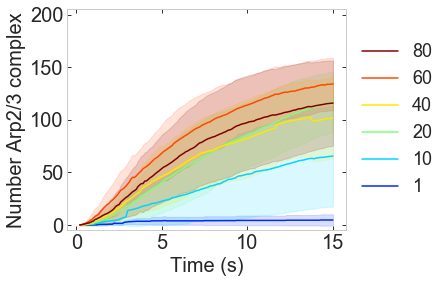

In [59]:
# plot 
plot_vs_time_by_parameter(arp_bound_by_config_mean,arp_bound_by_config_std, 'Number Arp2/3 complex', 'reverse')
plt.ylim([-5, 205])
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Arp_bound_vs_time_for_' +config_groups[0]+ '.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_Arp_bound_vs_time_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")



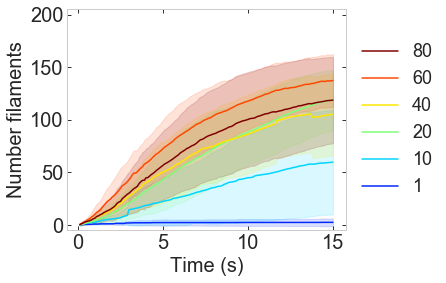

In [60]:
# plot final number ends (filaments)

plot_vs_time_by_parameter(ends_by_config_mean,ends_by_config_std, 'Number filaments', 'reverse')
plt.ylim([-5, 205])

if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Filaments_bound_vs_time_for_' +config_groups[0]+ '.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_Filaments_bound_vs_time_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")




In [24]:


def count_grouped_by_run(data_frame,column):
    # combine with solid to get all time points
    merged = pd.merge(solid_allparams, data_frame, on=['param_sweep','run','time'], how = 'right')
    # count number of 
    data_frame_time_count = merged.pivot_table(index=['param_sweep','run', 'time'], dropna = False, aggfunc={column:'count'})
#     MAX value grouped by run
    data_frame_run_count_max = data_frame_time_count.pivot_table(index=['param_sweep','run'], dropna = False, aggfunc={column:lambda x: np.nanpercentile(x,95)})
    
    # HERE get perecnetile ananymous function to work on pivot table.
    # data_frame_run_count = data_frame_time_count.pivot_table(index=['param_sweep','run'], dropna = False, aggfunc={column: np.percentile(a, q=95)})

    data_frame_max_count_grouped_mean = group_by_config_param_run(data_frame_run_count_max)[column].mean()
    data_frame_max_count_grouped_std = group_by_config_param_run(data_frame_run_count_max)[column].std()
    
    return data_frame_max_count_grouped_mean, data_frame_max_count_grouped_std 

arp_bound_max_count_param_mean, arp_bound_max_count_param_std = count_grouped_by_run(associated_arp_allparams, 'arp_id')

end_max_count_param_mean, end_max_count_param_std = count_grouped_by_run(hip1r_clusters_ends_recalibrated, 'length')

arp_bound_max_count_param_mean



NameError: name 'associated_arp_allparams' is not defined

In [64]:
# convert 'time' from string to float

associated_arp_allparams = associated_arp_allparams.reset_index()
associated_arp_allparams['time']=associated_arp_allparams['time'].astype(float)

# sort by run and time 

# filaments_near_base_agg = filaments_near_base_agg.set_index(['param_sweep', 'run', 'time']).sortlevel(level=[1,2])
associated_arp_allparams = associated_arp_allparams.set_index(['param_sweep', 'run', 'time']).sort_index(level=[1,2])



In [42]:
# mean last time points
idx = pd.IndexSlice
def last_timepoints_count(data_frame, column):

    data_frame_time_agg = data_frame.pivot_table(index=['param_sweep','run', 'time'], fill_value = 0, dropna = False, aggfunc={column:'count'})

    late_timepoints = data_frame_time_agg.loc[idx[:,:,10:15],:]
    late_timepoints_byconfig = group_by_config_param_run(late_timepoints)

    late_timepoints_byconfig_mean = late_timepoints_byconfig[column].mean()
    late_timepoints_byconfig_std  = late_timepoints_byconfig[column].std()

    return late_timepoints_byconfig_mean, late_timepoints_byconfig_std

arp_bound_last_timept_count_param_mean, arp_bound_last_timept_param_std  = last_timepoints_count(associated_arp_allparams, 'arp_id')

filaments_bound_last_timept_count_param_mean, filaments_bound_last_timept_param_std  = last_timepoints_count(hip1r_clusters_ends_recalibrated, 'length')


arp_bound_last_timept_count_param_mean


NameError: name 'associated_arp_allparams' is not defined

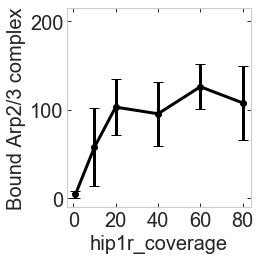

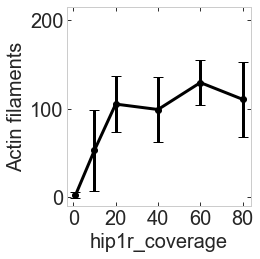

In [66]:


plt.figure(figsize=[4,4])       

plot_means_by_parameter(param_list_x,arp_bound_last_timept_count_param_mean, arp_bound_last_timept_param_std ,False,'Bound Arp2/3 complex')

plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
plt.ylim([-10, 215])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Bound_Arp23_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_Bound_Arp23_vs_' +config_groups[0]+ '.pdf')

    


plt.figure(figsize=[4,4])       

plot_means_by_parameter(param_list_x,filaments_bound_last_timept_count_param_mean, filaments_bound_last_timept_param_std, False,'Actin filaments')

plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
plt.ylim([-10, 215])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Bound_filaments_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_Bound_filaments_vs_' +config_groups[0]+ '.pdf')


## Plot internalization vs parameter value (1D)

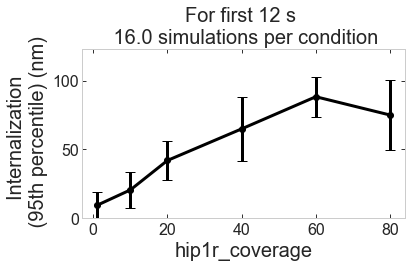

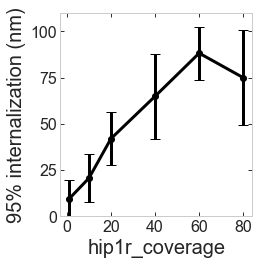

In [68]:
# Select only the time points ≤ maxTime, otherwise "mean" could bias toward simulations with more time points.

plt.figure()

xaxis_log = False



# Axis scale must be set prior to declaring the Formatter
# If it is not the Formatter will use the default log labels for ticks.
ax = plt.subplot(111)

if xaxis_log == True:
    ax.set_xscale('log')

    formatter = plt.FuncFormatter(log_10_product)
    ax.xaxis.set_major_formatter(formatter)
# ax.yaxis.set_major_formatter(formatter)

solid_to_max_time = solid_properties.loc[lambda solid_properties: solid_properties['time']<=maxTime]

mean_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].mean()
std_interns_95_by_parameter  = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].std()
# count of number time points that have a value for 'internalization_95thpercentile_to_set_time', divided by number time points
nb_runs_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].count()/(maxTime/timestep)

# nb_valid_runs_by_parameter   = solid_properties.groupby(property_groups)['internalization_95thpercentile_to_set_time'].count()
nb_runs_interns_95_by_parameter

x = param_list_x # for now, get from the larger list later
y = mean_interns_95_by_parameter*1000
std = std_interns_95_by_parameter*1000

plot_max = np.max(y + std) +20
# plot_min = np.min(means - stds)*1000

plt.xlabel(config_groups[0])
plt.ylabel('Internalization \n (95th percentile) (nm)')

# special caclulations of y axis 

# if 'arp2_position' in config_groups[0]:
#     print('this is arp position')
#     nb_arp=200
#     inner_circle=0.075
#     area=[np.pi*x1*x1-np.pi*inner_circle*inner_circle for x1 in x]
#     x = nb_arp/np.array(area)
#     plt.xlabel('Arp2/3 density (molecules/µm^2)')

if 'actin_rigidity'in config_groups[0]:
    kT =0.00414
    print('converting rigidity to persistence length')
    x = x/kT
    plt.xlabel('Actin persistence length (µm)')
    
# Convert arp2_area to density in molecules/µm2^2    

if 'arp2_area' in config_groups[0]:
    # find arp number from config
    arp_all = config_allparams['arp2_number']
    arp_nb_list = list(set(arp_all))
    arp_nb_unique = [float(x) for x in arp_nb_list]
    # won't work if arp number varies (mod below if so)
    x = arp_nb_unique[0]/x
    plt.xlabel('Arp2/3 density (molecules/µm^2)')
    
plt.rcParams["errorbar.capsize"]=5

plt.rc('font', size=16) 
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

plt.errorbar(x,y,std, fmt='ko-', linewidth=3)


#     ax.set_xlim(right = 15)
plt.ylim([0, plot_max])

# estimate of nubmer sims per parameter

nb_sims = nb_runs_interns_95_by_parameter.mean()

title = "For first " +str(maxTime) + " s \n " + str(nb_sims)+ " simulations per condition" 

plt.title(title)
plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()

if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_internalization95_vs_' +config_groups[0]+ '_labels.png')
    plt.savefig(working_dir+'figures/'+pref+'_internalization95_vs_' +config_groups[0]+ '_labels.pdf')

# ylim 100 nm

plt.figure(figsize=[4,4])   
ax = plt.subplot(111)

if xaxis_log == True:
    ax.set_xscale('log')

    import matplotlib.ticker as ticker
#     locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
#     ax.xaxis.set_major_locator(locmaj)
    formatter = plt.FuncFormatter(log_10_product_decimal)
    ax.xaxis.set_major_formatter(formatter)
#     locmin = ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
#     ax.xaxis.set_minor_locator(locmin)
#     ax.xaxis.set_minor_formatter(ticker.NullFormatter())
#     ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, numticks=15))
#     
plt.errorbar(x,y,std, fmt='ko-', linewidth=3)

plt.xlabel(config_groups[0])
plt.ylabel('95% internalization (nm)')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.ylim([0, 110])

plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])


# ax.get_xaxis().get_major_formatter().labelOnlyBase = False

if 'actin_rigidity'in config_groups[0]:
    plt.xlabel('Actin persistence length (µm)')   

if 'arp2_area' in config_groups[0]:
    plt.xlabel('Arp2/3 density \n (molecules/µm^2)')

plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_internalization95_vs_' +config_groups[0]+ '_y100.png')
    plt.savefig(working_dir+'figures/'+pref+'_internalization95_vs_' +config_groups[0]+ '_y100.pdf')



## Plot overlapping shaded error bars of internalziation over time. 

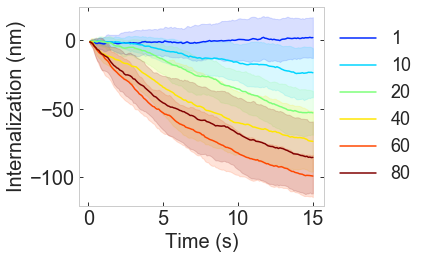

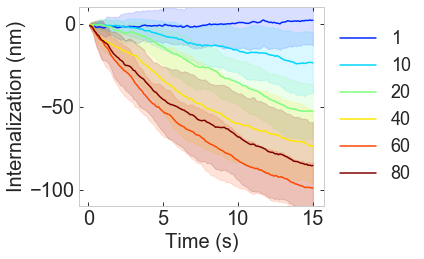

In [70]:

colors = plt.cm.jet(np.linspace(0, 1, len(solid_config_groups)+1))

fig = plt.figure(figsize=(5,4))

reverse_legend = False

commonaxis = plt.axes(frameon=True)

commonaxis.set( xlabel = 'Time (s)' )
commonaxis.set( ylabel = 'Internalization (nm)' )
plot_no = 1
plot_max = np.max(means + stds)*1000
plot_min = np.min(means - stds)*1000

values = []
ax = plt.subplot(1,1,1)
for name, group in solid_config_groups:
    
    color = colors[plot_no]
    
    x = means.loc[name].reset_index()['time']
    y = means.loc[name]*(-1000)
    std = stds.loc[name]*1000

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    ax.plot(x,y,c=color)
    ax.fill_between(x,np.array(y)-np.array(std), np.array(y)+np.array(std), alpha=0.15,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) #,linestyle='dashdot'


    title = ''
    for prop, value in zip(config_groups, str(name)):
        title += prop + ' = ' + str(name) + '\n'
        
#   for arp2_area, convert to density in molecules per µm^2
    if 'arp2_area' in config_groups[0]:
        name = int(arp_nb_unique[0]/float(name))
        
    values.append(name)    

    plot_no += 1
    
plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)


if reverse_legend == True:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(values), loc='center left', bbox_to_anchor=(1, 0.5))

# not reversed legend:
else:
    ax.legend(values, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Time (s)')
plt.ylabel('Internalization (nm)')

# plt.legend()
plt.tight_layout()

if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_internalization_vs_time_for_' +config_groups[0]+ '.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_internalization_vs_time_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")

# ylim 100

# colors = plt.cm.jet(np.linspace(0, 1, 8))

fig = plt.figure(figsize=(5,4))

plot_no = 1
plot_max = np.max(means + stds)*1000
plot_min = np.min(means - stds)*1000

values = []
ax = plt.subplot(1,1,1)
for name, group in solid_config_groups:
    
    color = colors[plot_no]
    
    x = means.loc[name].reset_index()['time']
    y = means.loc[name]*(-1000)
    std = stds.loc[name]*1000

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    ax.plot(x,y,c=color)
    ax.fill_between(x,np.array(y)-np.array(std), np.array(y)+np.array(std), alpha=0.15,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) #,linestyle='dashdot'


    title = ''
    for prop, value in zip(config_groups, str(name)):
        title += prop + ' = ' + str(name) + '\n'
        
#   for arp2_area, convert to density in molecules per µm^2
    if 'arp2_area' in config_groups[0]:
        name = int(arp_nb_unique[0]/float(name))
        
    if 'bud_confine' in config_groups[0]:
        name = '%.2g' % (float(name)/1000)
    values.append(name)    

    plot_no += 1
    
#     if plot_no ==8:
#         break
    
plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)



if reverse_legend == True:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(values), loc='center left', bbox_to_anchor=(1, 0.5))

# not reversed legend:
else:
    ax.legend(values, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Time (s)')
plt.ylabel('Internalization (nm)')

plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

    
plt.ylim([-110, 10])

plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_internalization_vs_time_for_' +config_groups[0]+ '_y100.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_internalization_vs_time_for_' +config_groups[0]+ '_y100.pdf',bbox_inches="tight")




## Plot each track over time grouped by parameter

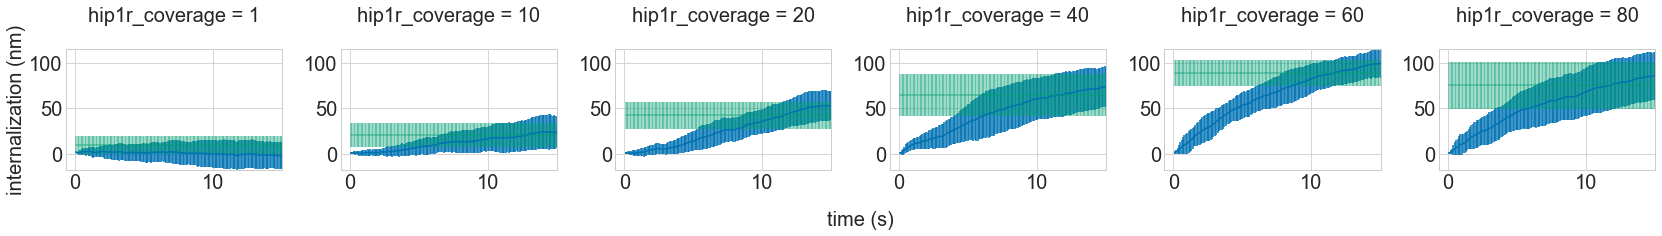

In [71]:

# may want to plot negative to match my other figures. 
mean_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].mean()
std_interns_95_by_parameter  = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].std()


num_plots = len(solid_config_groups)

width = 6
if width > num_plots:
    width = 1
height = int(math.ceil(float(num_plots)/float(width)))

fig = plt.figure()
fig.set_size_inches(4*width,4*height)

commonaxis = plt.axes(frameon=False)
commonaxis.set_xticks([])
commonaxis.set_yticks([])
commonaxis.yaxis.labelpad = 40 # move the labels a bit away from panels
commonaxis.xaxis.labelpad = 40 # move the labels a bit away from panels
commonaxis.set( xlabel = 'time (s)' )
commonaxis.set( ylabel = 'internalization (nm)' )
plt.rcParams["errorbar.capsize"]=0
plot_no = 1
plot_max = np.max(means + stds)*1000
plot_min = np.min(means - stds)*1000

for name, group in solid_config_groups:
    x = means.loc[name].reset_index()['time']
    y = means.loc[name]*1000
    std = stds.loc[name]*1000

    ax = fig.add_subplot(height, width, plot_no)
    ax.errorbar(x,y,std)
    ax.set_xlim(right = 15)
    ax.set_ylim(bottom = plot_min, top = plot_max)
    
    # plot 95th percentile on top
    
    means95=mean_interns_95_by_parameter.loc[name]*1000
    stds95=std_interns_95_by_parameter.loc[name]*1000

    ax.errorbar(x, np.matlib.repmat(means95,len(x),1), np.matlib.repmat(stds95,len(x),1), alpha=0.5)

    # shaded bar HERE

# plt.plot(time_inSeconds,mean,c=color)
# plt.fill_between(time_inSeconds,np.array(mean)-np.array(stddev), np.array(mean)+np.array(stddev), alpha=0.15,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) #,linestyle='dashdot'


    title = ''
    for prop, value in zip(config_groups, str(name)):
        title += prop + ' = ' + str(name) + '\n'
#         title += prop + ' = ' + name + '\n'
        
#         title += prop + ' = ' + value + '\n'


    ax.set_title(title)
    # ax2[plot_row, plot_col].set_title(title)  

#     print( plot_no)

    plot_no += 1
    
    # temporary
#     plt.ylim(0, 100)

plt.tight_layout()

if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_mean_internalization95_vs_time_for_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_mean_internalization95_vs_time_for_' +config_groups[0]+ '.pdf')



In [72]:
# number barbed ends base vs parameter

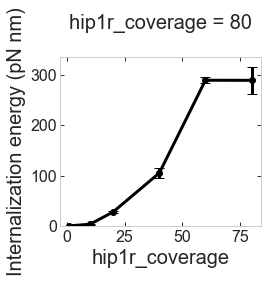

In [73]:
# net force vs param (internalization x spring constant)
#  for vs spring constant

# intern energy vserus param (1/2 k * internalization^2)


# Select only the time points ≤ maxTime, otherwise "mean" could bias toward simulations with more time points.

plt.figure(figsize=[4,4]) 

xaxis_log = False



# Axis scale must be set prior to declaring the Formatter
# If it is not the Formatter will use the default log labels for ticks.
ax = plt.subplot(111)

if xaxis_log == True:
    ax.set_xscale('log')

    formatter = plt.FuncFormatter(log_10_product)
    ax.xaxis.set_major_formatter(formatter)
# ax.yaxis.set_major_formatter(formatter)

solid_to_max_time = solid_properties.loc[lambda solid_properties: solid_properties['time']<=maxTime]

mean_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].mean()
std_interns_95_by_parameter  = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].std()
# count of number time points that have a value for 'internalization_95thpercentile_to_set_time', divided by number time points
nb_runs_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].count()/(maxTime/timestep)

# full trace

mean_interns_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile'].mean()
std_interns_by_parameter  = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile'].std()



x = param_list_x # for now, get from the larger list later

# pN x pN/nm

y   = 0.5 * mean_interns_by_parameter * mean_interns_by_parameter * x *1000
std = 0.5 * std_interns_by_parameter * std_interns_by_parameter * x *1000

plot_max = np.max(y + std) +20
# plot_min = np.min(means - stds)*1000

plt.xlabel(config_groups[0])
plt.ylabel('Internalization energy (pN nm)')

# special caclulations of y axis 

# if 'arp2_position' in config_groups[0]:
#     print('this is arp position')
#     nb_arp=200
#     inner_circle=0.075
#     area=[np.pi*x1*x1-np.pi*inner_circle*inner_circle for x1 in x]
#     x = nb_arp/np.array(area)
#     plt.xlabel('Arp2/3 density (molecules/µm^2)')

if 'actin_rigidity'in config_groups[0]:
    kT =0.00414
    print('converting rigidity to persistence length')
    x = x/kT
    plt.xlabel('Actin persistence length (µm)')
    
# Convert arp2_area to density in molecules/µm2^2    

if 'arp2_area' in config_groups[0]:
    # find arp number from config
    arp_all = config_allparams['arp2_number']
    arp_nb_list = list(set(arp_all))
    arp_nb_unique = [float(x) for x in arp_nb_list]
    # won't work if arp number varies (mod below if so)
    x = arp_nb_unique[0]/x
    plt.xlabel('Arp2/3 density (molecules/µm^2)')
    
plt.rcParams["errorbar.capsize"]=5

plt.rc('font', size=16) 
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

plt.errorbar(x,y,std, fmt='ko-', linewidth=3)


#     ax.set_xlim(right = 15)
plt.ylim([0, plot_max])

# plt.xlim([0.9, 550])
# plt.ylim([0, 30])

# estimate of nubmer sims per parameter

nb_sims = nb_runs_interns_95_by_parameter.mean()

# title = "For first " +str(maxTime) + " s \n " + str(nb_sims)+ " simulations per condition" 

plt.title(title)
plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()

if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_internalization_energy_vs_' +config_groups[0]+ '_labels.png')
    plt.savefig(working_dir+'figures/'+pref+'_internalization_energy_vs_' +config_groups[0]+ '_labels.pdf')

# # ylim 100 nm

# plt.figure(figsize=[4,4])   
# ax = plt.subplot(111)

# if xaxis_log == True:
#     ax.set_xscale('log')

#     formatter = plt.FuncFormatter(log_10_product)
#     ax.xaxis.set_major_formatter(formatter)
    
# plt.errorbar(x,y,std, fmt='ko-', linewidth=3)

# plt.xlabel(config_groups[0])
# plt.ylabel('95% internalization (nm)')

# plt.tick_params(reset=True, color='black', direction='in', length=4)
# plt.grid(False)

# plt.ylim([0, 110])

# plt.rc('font', size=20) 
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 

# # plt.xticks([0,20,40,60,80])

# # ax.get_xaxis().get_major_formatter().labelOnlyBase = False

# if 'actin_rigidity'in config_groups[0]:
#     plt.xlabel('Actin persistence length (µm)')   

# if 'arp2_area' in config_groups[0]:
#     plt.xlabel('Arp2/3 density \n (molecules/µm^2)')

# plt.tight_layout()
# if save_figures == 'yes':
#     plt.savefig(working_dir+'figures/'+pref+'_internalization95_vs_' +config_groups[0]+ '_y100.png')
#     plt.savefig(working_dir+'figures/'+pref+'_internalization95_vs_' +config_groups[0]+ '_y100.pdf')



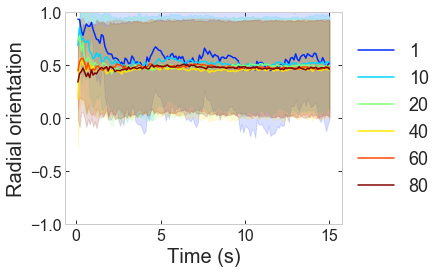

In [76]:
# plot radial orientation over time grouped by param

ends_means = ends_grouped['radial_orientation'].mean()
ends_stds = ends_grouped['radial_orientation'].std()

plot_vs_time_by_parameter(ends_means, ends_stds, 'Radial orientation')

plt.ylim([-1, 1])

if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_radial_orientation_vs_time_for_' +config_groups[0]+ '.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_radial_orientation_vs_time_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")




In [78]:
## number filaments in hip1r network vs parameter

In [79]:
# for when header is misnamed plus_zir
if 'plus_zir' in list(hip1r_clusters_ends_recalibrated):
    hip1r_clusters_ends_recalibrated['plus_zdir']=hip1r_clusters_ends_recalibrated['plus_zir']

## convert to degrees, oriented vertically such that +90 is POSITIVE orientation and -90 is negative orientation

hip1r_clusters_ends_recalibrated['zdir_deg_flip90'] = np.degrees((np.arccos(hip1r_clusters_ends_recalibrated['plus_zdir'])-(np.pi)/2))


In [80]:
# axial orientation: heat map

ends_grouped=group_by_config(hip1r_clusters_ends_recalibrated)



value: 1
value: 10
value: 20
value: 40
value: 60
value: 80


<Figure size 432x288 with 0 Axes>

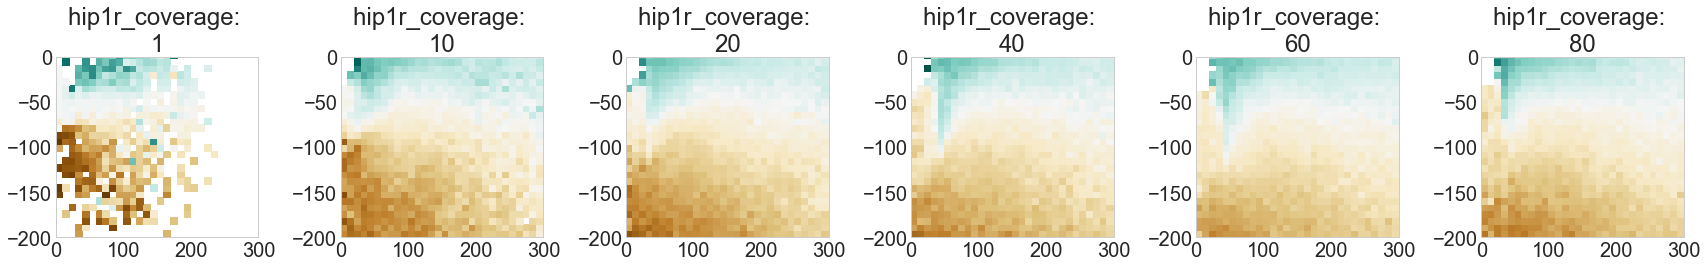

In [81]:
# plot mean axial orientation RZ heat map for all runs, times vs config value

ends_grouped_run = group_by_config_param_run(hip1r_clusters_ends_recalibrated)

num_plots = len(ends_grouped_run)

plt.set_cmap('BrBG')
plot_nb = 1

width = 6
if width > num_plots:
    width = 1
height = int(math.ceil(float(num_plots)/float(width)))

fig = plt.figure()
fig.set_size_inches(4*width,4*height)

for name, group in ends_grouped_run:
    print('value: ' + str(name))
    
#     all for a given config
    x = group['plus_rpos_recalibrated']*1000
    y = (group['plus_zpos']+0.4)*(-1000)
    color = group['zdir_deg_flip90']
    
    # zdir heat map RZ

    plt.subplot(1,len(ends_grouped_run),plot_nb)

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
      bins=30, statistic='mean', range = [[0,300],[-200,20]])
    bin_means = np.flipud(np.rot90(bin_means))

    # bin_means = bin_means/len(runs)/len(times)

    # color map 

    plt.pcolormesh(xedges, yedges, bin_means)

    # color map hsv[0, 75%]

    # plt.pcolormesh(xedges, yedges, bin_means, cmap=new_cmap)

#     cbar = plt.colorbar(label = 'Axial orientation')
    plt.clim([-90,90])
#     cbar.set_ticks([-90, -45, 0, 45, 90])
    # plt.caxis([-90, 90])
#     plt.xlabel('R (nm)')
#     plt.ylabel('Z (nm)')
    plt.ylim([-200,0])
    plt.xticks([0, 100, 200, 300], size=20)
    plt.yticks(size=20)
    
    plt.title(config_groups[0]+': \n'+str(name),fontsize=24)

    plot_nb+=1
    
    plt.tight_layout()
    
# cbar = plt.colorbar(label = 'Axial orientation')
# cbar.set_ticks([-90, -45, 0, 45, 90])

if(save_figures=='yes'):

    plt.savefig(working_dir+'figures/'+pref+'_axial_orientation_RZ_for_' +config_groups[0]+ '.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_axial_orientation_RZ_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")


plt.show()
    
#     print(group['zdir_deg_flip90'][0:10].tolist())
#     print("\n")

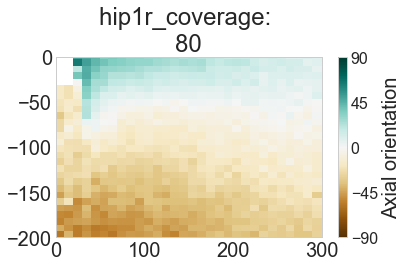

In [82]:
# colorbar
plt.figure(figsize=(6,4))
plt.pcolormesh(xedges, yedges, bin_means)

plt.clim([-90,90])

plt.ylim([-200,0])
plt.xticks([0, 100, 200, 300], size=20)
plt.yticks(size=20)

plt.title(config_groups[0]+': \n'+str(name),fontsize=24)

plot_nb+=1

plt.tight_layout()

cbar = plt.colorbar(label = 'Axial orientation')
cbar.set_ticks([-90, -45, 0, 45, 90])

if(save_figures=='yes'):

    plt.savefig(working_dir+'figures/'+pref+'_axial_orientation_RZ_for_' +config_groups[0]+ '_colorbar.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_axial_orientation_RZ_for_' +config_groups[0]+ '_colorbar.pdf',bbox_inches="tight")


plt.show()


value: 1
value: 10
value: 20
value: 40
value: 60
value: 80


<Figure size 432x288 with 0 Axes>

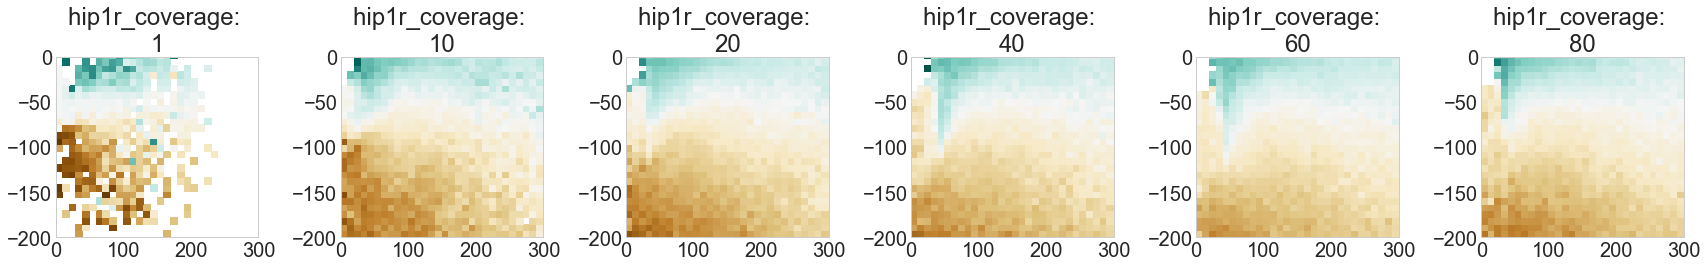

In [83]:
# function: plot RZ heat map for all runs and times vs config value

# e.g.  heat_map_RZ_by_config(ends_grouped_run, 'zdir_deg_flip90', [-90, 90]):

def heat_map_RZ_by_config(grouped_run, metric, clim_range):

    num_plots = len(grouped_run)

    plt.set_cmap('BrBG')
    plot_nb = 1

    width = 6
    if width > num_plots:
        width = 1
    height = int(math.ceil(float(num_plots)/float(width)))

    fig = plt.figure()
    fig.set_size_inches(4*width,4*height)

    for name, group in grouped_run:
        print('value: ' + str(name))

    #     all for a given config
        x = group['plus_rpos_recalibrated']*1000
        y = (group['plus_zpos']+0.4)*(-1000)
        color = group[metric]

        # zdir heat map RZ

        plt.subplot(1,len(ends_grouped_run),plot_nb)

        bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
          bins=30, statistic='mean', range = [[0,300],[-200,20]])
        bin_means = np.flipud(np.rot90(bin_means))

        # bin_means = bin_means/len(runs)/len(times)

        # color map 

        plt.pcolormesh(xedges, yedges, bin_means)

        # color map hsv[0, 75%]

        # plt.pcolormesh(xedges, yedges, bin_means, cmap=new_cmap)

    #     cbar = plt.colorbar(label = 'Axial orientation')
        plt.clim(clim_range)
    #     cbar.set_ticks([-90, -45, 0, 45, 90])
        # plt.caxis([-90, 90])
    #     plt.xlabel('R (nm)')
    #     plt.ylabel('Z (nm)')
        plt.ylim([-200,0])
        plt.xticks([0, 100, 200, 300], size=20)
        plt.yticks(size=20)

        plt.title(config_groups[0]+': \n'+str(name),fontsize=24)

        plot_nb+=1

        plt.tight_layout()
    
heat_map_RZ_by_config(ends_grouped_run, 'zdir_deg_flip90', [-90, 90])
    
# if(save_figures=='yes'):

#     plt.savefig(working_dir+'figures/'+pref+'_axial_orientation_RZ_for_' +config_groups[0]+ '.png',bbox_inches="tight")
#     plt.savefig(working_dir+'figures/'+pref+'_axial_orientation_RZ_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")


plt.show()
    
#     print(group['zdir_deg_flip90'][0:10].tolist())
#     print("\n")

In [84]:
# over time

# several time points, per param

# axial orienation: parallel filament location


In [85]:
# for barbed ends near base only: their bending angle, and therefore some measure of force (or energy?) 

# or simply their force over time

In [86]:
# number of barbed ends at base versus neck: add to dataframe as True if within criteria

close_metric = 0.0075

near_base = hip1r_clusters_ends_recalibrated['plus_zpos']+0.4<close_metric
hip1r_clusters_ends_recalibrated['near_base'] = near_base

# near_neck = (hip1r_clusters_ends_recalibrated['plus_rpos_recalibrated']<(0.03+close_metric) and hip1r_clusters_ends_recalibrated['plus_zpos_recalibrated']<0.010)
nn1 = hip1r_clusters_ends_recalibrated['plus_rpos_recalibrated']<(0.03+close_metric)
nn2 = hip1r_clusters_ends_recalibrated['plus_zpos_recalibrated']<0.010
near_neck = nn1 & nn2

# near_neck = [(all(x['plus_rpos_recalibrated']<(0.03+close_metric),x['plus_zpos_recalibrated']<0.010) for x in hip1r_clusters_ends_recalibrated)]
hip1r_clusters_ends_recalibrated['near_neck'] = near_neck

# hip1r_clusters_ends_recalibrated.tail()
# near_neck

In [87]:

# sum up number of e.g. 'near_base == True' and then take mean over runs, per parameter

def count_number_by_config(data_frame, column):

    # combine with solid to get all time points
    merged = pd.merge(solid_allparams, data_frame, on=['param_sweep','run','time'], how = 'right')
    # count number of "True"
    data_frame_time_count = merged.pivot_table(index=['param_sweep','run', 'time'], dropna = False, aggfunc={column:'sum'})
    # convert Nan to 0
    data_frame_time_count.fillna(0, inplace=True)
    # group by parameter
    df_grouped_config = group_by_config(data_frame_time_count)

    mean_total_by_config_over_time = df_grouped_config.mean()
    std_total_by_config_over_time  = df_grouped_config.std()

    return mean_total_by_config_over_time, std_total_by_config_over_time

# number near base

near_base_by_config_time_mean, near_base_by_config_time_std = count_number_by_config(hip1r_clusters_ends_recalibrated, 'near_base')

# number near neck

near_neck_by_config_time_mean, near_neck_by_config_time_std = count_number_by_config(hip1r_clusters_ends_recalibrated, 'near_neck')




# near_base_by_config_time_mean


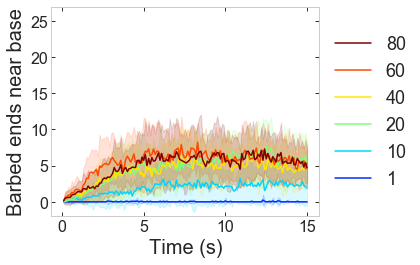

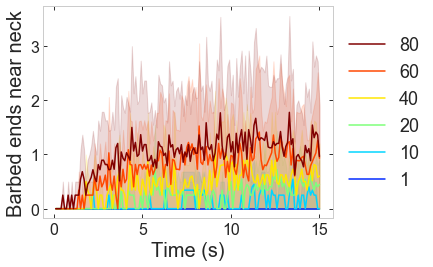

In [88]:
# plot number near base, neck vs parameter


plot_vs_time_by_parameter(near_base_by_config_time_mean, near_base_by_config_time_std, 'Barbed ends near base', 'reverse')
plt.ylim([-2, 27])
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_barbed_ends_near_base_vs_time_for_' +config_groups[0]+ '.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_barbed_ends_near_base_vs_time_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")

plot_vs_time_by_parameter(near_neck_by_config_time_std, near_neck_by_config_time_std, 'Barbed ends near neck', 'reverse')

if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_barbed_ends_near_neck_vs_time_for_' +config_groups[0]+ '.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_barbed_ends_near_neck_vs_time_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")





## number barbed ends 95th percentile vs parameter

In [89]:
# # to SUM a value like "near_base"
# def sum_grouped_by_run(data_frame,column):
#     # combine with solid to get all time points
#     merged = pd.merge(solid_allparams, data_frame, on=['param_sweep','run','time'], how = 'right')
#     # count number of 
#     data_frame_time_count = merged.pivot_table(index=['param_sweep','run', 'time'], dropna = False, aggfunc={column:'sum'})
# #     95th percentile:
#     data_frame_run_count_max = data_frame_time_count.pivot_table(index=['param_sweep','run'], dropna = False, aggfunc={column:lambda x: np.nanpercentile(x,95)})
    
#     # HERE get perecnetile ananymous function to work on pivot table.
#     # data_frame_run_count = data_frame_time_count.pivot_table(index=['param_sweep','run'], dropna = False, aggfunc={column: np.percentile(a, q=95)})

#     data_frame_max_count_grouped_mean = group_by_config_param_run(data_frame_run_count_max)[column].mean()
#     data_frame_max_count_grouped_std = group_by_config_param_run(data_frame_run_count_max)[column].std()
    
#     return data_frame_max_count_grouped_mean, data_frame_max_count_grouped_std 

# ends_base_max_count_param_mean, ends_base_max_count_param_std = sum_grouped_by_run(hip1r_clusters_ends_recalibrated, 'near_base')

# ends_base_max_count_param_mean


In [25]:
# last time points. 

def last_timepoints(data_frame, column):

    data_frame_time_agg = data_frame.pivot_table(index=['param_sweep','run', 'time'], fill_value = 0, dropna = False, aggfunc={column:'sum'})

    late_timepoints = data_frame_time_agg.loc[idx[:,:,10:15],:]
    late_timepoints_byconfig = group_by_config_param_run(late_timepoints)

    late_timepoints_byconfig_mean = late_timepoints_byconfig[column].mean()
    late_timepoints_byconfig_std  = late_timepoints_byconfig[column].std()

    return late_timepoints_byconfig_mean, late_timepoints_byconfig_std

In [91]:
# mean last time points
# aaaaaa
ends_base_last_timept_count_param_mean, ends_base_last_timept_param_std  = last_timepoints(hip1r_clusters_ends_recalibrated, 'near_base')

ends_base_last_timept_count_param_mean


hip1r_coverage
1     0.022059
10    2.357843
20    6.209559
40    5.084559
60    5.912990
80    5.862745
Name: near_base, dtype: float64

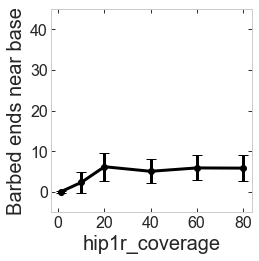

In [92]:
# plt.figure(figsize=[4,4])     
# plot_means_by_parameter(param_list_x,ends_base_max_count_param_mean, ends_base_max_count_param_std,True,'Barbed ends near base' )


# # plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
# plt.ylim([-5, 45])


# plt.tight_layout()
# if save_figures == 'yes':
#     plt.savefig(working_dir+'figures/'+pref+'_Ends_near_base_max_vs_' +config_groups[0]+ '.png')
#     plt.savefig(working_dir+'figures/'+pref+'_Ends_near_base_max_vs_' +config_groups[0]+ '.pdf')
    


plt.figure(figsize=[4,4])     
plot_means_by_parameter(param_list_x,ends_base_last_timept_count_param_mean, ends_base_last_timept_param_std, False,'Barbed ends near base' )


plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
plt.ylim([-5, 45])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Ends_near_base_last_timepts_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_Ends_near_base_last_timepts_vs_' +config_groups[0]+ '.pdf')
    



## plot bending energy over time vs param

In [94]:
# final_bound_hip1r_allparams has index problem with apram_sweep in index and in column

In [27]:
# make a backup
final_bound_hip1r_allparams_copy = final_bound_hip1r_allparams


In [28]:
# fix index "param sweep" for final_bound hip1r
#  fix this earlier soon!

# copy
# final_bound_hip1r_allparams_copy = final_bound_hip1r_allparams

# from copy    
final_bound_hip1r_allparams = final_bound_hip1r_allparams_copy

final_bound_hip1r_allparams = final_bound_hip1r_allparams.reset_index()

nb_rows = len(final_bound_hip1r_allparams.index)
new_param_sweep_label = [output_dirs[0] for i in range(nb_rows)]

# final_bound_hip1r_allparams = final_bound_hip1r_allparams.drop(columns = ['param_sweep'])
final_bound_hip1r_allparams['param_sweep']=new_param_sweep_label
final_bound_hip1r_allparams = final_bound_hip1r_allparams.set_index(['param_sweep', 'run', 'time'])
# bb['param_sweep'] = 'hip1r_sphere_output '
final_bound_hip1r_allparams.head()

hip1r_id  state  fiber_id  \
param_sweep                  run          time                              
vary_spring_stiffness_output run0007_0008 0.1         90      1        10   
                                          0.2        114      1        10   
                                          0.3         20      1        10   
                                          0.4         20      1        10   
                                          0.5         20      1        10   

                                                hip1r_xpos  hip1r_ypos  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0007_0008 0.1     0.039338   -0.020674   
                                          0.2     0.045928   -0.000085   
                                          0.3     0.020539    0.038699   
                                          0.4     0.018351    0.038809   
                                          0.5     0.017496    0.039619   

                                                hip1r_zpos  hip1r_xforce  \
param_sweep                  run          time                             
vary_spring_stiffness_output run0007_0008 0.1    -0.393141      -25.7879   
                                          0.2    -0.398301      257.8250   
                                          0.3    -0.395973     -232.5340   
                                          0.4    -0.398467        4.2336   
                                          0.5    -0.397665        6.8669   

                                                hip1r_yforce  hip1r_zforce  \
param_sweep                  run          time                               
vary_spring_stiffness_output run0007_0008 0.1        -38.875      -22.1276   
                                          0.2       1426.450      212.0510   
                                          0.3         58.852      160.1340   
                                          0.4       -128.804      235.7450   
                                          0.5        -78.737      258.8980   

                                                abscissa  \
param_sweep                  run          time             
vary_spring_stiffness_output run0007_0008 0.1   0.009943   
                                          0.2   0.033007   
                                          0.3   0.083629   
                                          0.4   0.083770   
                                          0.5   0.083770   

                                                         ...             \
param_sweep                  run          time           ...              
vary_spring_stiffness_output run0007_0008 0.1            ...              
                                          0.2            ...              
                                          0.3            ...              
                                          0.4            ...              
                                          0.5            ...              

                                                   dir_z  scalar_force  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0007_0008 0.1   0.679223     51.632471   
                                          0.2   0.096765   1464.991113   
                                          0.3   0.161759    288.406860   
                                          0.4   0.332705    268.670986   
                                          0.5   0.322205    270.693265   

                                                hip1r_rpos  bud_xpos  \
param_sweep                  run          time                         
vary_spring_stiffness_output run0007_0008 0.1     0.044440  0.000563   
                                          0.2     0.045928  0.000937   
                                          0.3     0.043812  0.000497   
                                          0.4     0.042929 -0.001691   
           

In [29]:
if 'plus_zir' in list(hip1r_clusters_ends_recalibrated):
    hip1r_clusters_ends_recalibrated['plus_zdir']=hip1r_clusters_ends_recalibrated['plus_zir']

In [30]:
# calculate bending energy, direct + indirect over time

# direct bound filaments only

branched_actin_bound_ends_attachment = pd.merge(hip1r_clusters_ends_recalibrated,final_bound_hip1r_allparams, how='outer', on = ['param_sweep','run', 'time', 'fiber_id'])

branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.drop(columns = ['bud_xpos_x',
                                                                                   'bud_ypos_x', 'bud_zpos_x', 'bud_internalization_x'])

branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.rename(
    index=str, columns={'bud_xpos_y':'bud_xpos','bud_ypos_y':'bud_ypos',
                        'bud_zpos_y':'bud_zpos',
                        'bud_internalization_y':'bud_internalization'})

# filter ONLY the direct bound filaments, which DO have hip1r info 

hip1r_bound_ends_attachment = branched_actin_bound_ends_attachment.loc[branched_actin_bound_ends_attachment['dir_z'].notna()]


# orientation plus end
x_dir_plus = hip1r_bound_ends_attachment.plus_xdir
y_dir_plus = hip1r_bound_ends_attachment.plus_ydir
z_dir_plus = hip1r_bound_ends_attachment.plus_zdir

xyz_dir_plus = np.array([[x_dir_plus], [y_dir_plus], [z_dir_plus]])


z_dir_plus_rad = np.arccos(z_dir_plus)
z_dir_plus_rad_flip90 = -(z_dir_plus_rad-(np.pi)/2)

# length filament

filament_length = np.array(hip1r_bound_ends_attachment.length)

# from hip1r-last-attachment
# final_bound_hip1r

# orientation last attachment

x_dir_final_attachment = hip1r_bound_ends_attachment.dir_x
y_dir_final_attachment = hip1r_bound_ends_attachment.dir_y
z_dir_final_attachment = hip1r_bound_ends_attachment.dir_z

xyz_dir_final_attachment = np.array([[x_dir_final_attachment], [y_dir_final_attachment], [z_dir_final_attachment]])

# abscissa last attachment


abscissa = np.array(hip1r_bound_ends_attachment.abscissa)

# plt.hist(filament_length)

length_to_plus_end = filament_length-abscissa

# plt.hist(length_to_plus_end)

hip1r_bound_ends_attachment['length_to_plus_end'] = length_to_plus_end

# formula is:

# length to plus end is length minus abscissa(hip1r-last-point), right?
# dot product orientation attachment and plus end

# dot_product_attachment_plus_end = np.dot(xyz_dir_final_attachment, xyz_dir_plus)

# slow way to do it
dot_product_attachment_plus_end = [np.dot([x_dir_plus[i],y_dir_plus[i],z_dir_plus[i]] , [x_dir_final_attachment[i],y_dir_final_attachment[i],z_dir_final_attachment[i]]) for i, vec in enumerate(x_dir_plus)]

# fast way, matrix type dot product?

# dot_product_attachment_plus_end = np.multiply(x_dir_final_attachment, x_dir_plus) + np.multiply(y_dir_final_attachment,y_dir_plus) + np.multiply(z_dir_final_attachment, z_dir_plus)

# round dot product to 3 decimals to avoid rounding errors and values a tiny bit >1

bending_angle_radian = np.arccos(np.around(dot_product_attachment_plus_end,3))

bending_angle_degrees = np.degrees(np.arccos(np.around(dot_product_attachment_plus_end,3)))

hip1r_bound_ends_attachment['bending_angle_degrees'] = bending_angle_degrees


kT = 0.00414 #pN um
Lp = 10 # um, calculate this from properties when it varies.

# calculate bending energy:
# Lp.*thetas.*thetas*kT/(2*s)
# convert to pN nm rather than pN um

bending_energy=kT*Lp*pow(bending_angle_radian,2)/(2*length_to_plus_end)*1000

hip1r_bound_ends_attachment['bending_energy'] = bending_energy
hip1r_bound_ends_attachment.head()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

fiber_id   length  \
param_sweep                  run          time                      
vary_spring_stiffness_output run0007_0008 0.1         10  0.03087   
                                          0.2         10  0.06696   
                                          0.3         10  0.11658   
                                          0.4         10  0.15921   
                                          0.5         10  0.15921   

                                                minus_state  minus_xpos  \
param_sweep                  run          time                            
vary_spring_stiffness_output run0007_0008 0.1             0     0.03575   
                                          0.2             0     0.03483   
                                          0.3             0     0.03478   
                                          0.4             0     0.03216   
                                          0.5             0     0.03202   

                                                minus_ypos  minus_zpos  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0007_0008 0.1     -0.02698    -0.39987   
                                          0.2     -0.03076    -0.39202   
                                          0.3     -0.03128    -0.39142   
                                          0.4     -0.03123    -0.39379   
                                          0.5     -0.02953    -0.39143   

                                                minus_xdir  minus_ydir  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0007_0008 0.1      0.36331     0.63770   
                                          0.2      0.50355     0.77002   
                                          0.3      0.42194     0.74349   
                                          0.4      0.53436     0.79410   
                                          0.5      0.45318     0.71947   

                                                minus_zdir  plus_state  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0007_0008 0.1      0.67922           1   
                                          0.2     -0.39180           1   
                                          0.3     -0.51883           1   
                                          0.4     -0.28960           4   
                                          0.5     -0.52630           4   

                                                     ...        bud_xpos  \
param_sweep                  run          time       ...                   
vary_spring_stiffness_output run0007_0008 0.1        ...        0.000563   
                                          0.2        ...        0.000937   
                                          0.3        ...        0.000497   
                                          0.4        ...       -0.001691   
                                          0.5        ...       -0.002546   

                                                bud_ypos  bud_zpos  \
param_sweep                  run          time                       
vary_spring_stiffness_output run0007_0008 0.1   0.001586 -0.398234   
                                          0.2  -0.000959 -0.398600   
                                          0.3  -0.001581 -0.396910   
                                          0.4  -0.001471 -0.399404   
                                          0.5  -0.000661 -0.398602   

                                                bud_internalization  \
param_sweep                  run          time                        
vary_spring_stiffness_output run0007_0008 0.1              0.001766   
                                          0.2              0.001400   
                                          0.3              0.003090   
                                          0.4              0.000596   
                               

In [31]:
# merge ends and final_hip1r, include indirect 

branched_actin_bound_ends_attachment = pd.merge(hip1r_clusters_ends_recalibrated,final_bound_hip1r_allparams, how='outer', on = ['param_sweep','run', 'time', 'fiber_id'])

branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.drop(columns = ['bud_xpos_x',
                                                                                   'bud_ypos_x', 'bud_zpos_x', 'bud_internalization_x'])

branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.rename(
    index=str, columns={'bud_xpos_y':'bud_xpos','bud_ypos_y':'bud_ypos',
                        'bud_zpos_y':'bud_zpos',
                        'bud_internalization_y':'bud_internalization'})

# filter ONLY the indirect bound filaments, which do not have hip1r info 

indirect_bound_ends_attachment = branched_actin_bound_ends_attachment.loc[branched_actin_bound_ends_attachment['dir_z'].isna()]

# orientation plus end
x_dir_plus = indirect_bound_ends_attachment.plus_xdir
y_dir_plus = indirect_bound_ends_attachment.plus_ydir
z_dir_plus = indirect_bound_ends_attachment.plus_zdir

# length filament

filament_length = indirect_bound_ends_attachment.length

indirect_bound_ends_attachment['length_to_plus_end'] = filament_length 

# orientation MINUS END

x_dir_minus = indirect_bound_ends_attachment.minus_xdir
y_dir_minus = indirect_bound_ends_attachment.minus_ydir
z_dir_minus = indirect_bound_ends_attachment.minus_zdir


# formula is:

# length to plus end 
# dot product orientation attachment and plus end

# dot_product_minus_plus_end = np.multiply(x_dir_minus, x_dir_plus) + np.multiply(y_dir_minus,y_dir_plus) + np.multiply(z_dir_minus, z_dir_plus)

dot_product_minus_plus_end = [np.dot([x_dir_minus[i],y_dir_minus[i],z_dir_minus[i]] , [x_dir_plus[i],y_dir_plus[i],z_dir_plus[i]]) for i, vec in enumerate(x_dir_plus)]



# round dot product to 3 decimals to avoid rounding errors and values a tiny bit >1

bending_angle_radian = np.arccos(np.around(dot_product_minus_plus_end,3))

bending_angle_degrees = np.degrees(np.arccos(np.around(dot_product_minus_plus_end,3)))

indirect_bound_ends_attachment['bending_angle_degrees'] = bending_angle_degrees

kT = 0.00414 #pN um
Lp = 10 # um, calculate this from properties when it varies.

# calculate bending energy:
# Lp.*thetas.*thetas*kT/(2*s)
# convert to pN nm rather than pN um

bending_energy=kT*Lp*pow(bending_angle_radian,2)/(2*filament_length)*1000

indirect_bound_ends_attachment['bending_energy'] = bending_energy
indirect_bound_ends_attachment.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

fiber_id   length  \
param_sweep                  run          time                      
vary_spring_stiffness_output run0007_0008 0.5         36  0.01427   
                                          0.6         36  0.06302   
                                          0.7         36  0.11302   
                                          0.8         36  0.16288   
                                          0.8         40  0.00682   

                                                minus_state  minus_xpos  \
param_sweep                  run          time                            
vary_spring_stiffness_output run0007_0008 0.5             0    -0.00224   
                                          0.6             0     0.00065   
                                          0.7             0     0.00074   
                                          0.8             0     0.00008   
                                          0.8             0     0.03874   

                                                minus_ypos  minus_zpos  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0007_0008 0.5      0.05124    -0.38973   
                                          0.6      0.04087    -0.37964   
                                          0.7      0.04094    -0.37929   
                                          0.8      0.04104    -0.38117   
                                          0.8      0.05929    -0.39299   

                                                minus_xdir  minus_ydir  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0007_0008 0.5      0.27307     0.91464   
                                          0.6     -0.11737     0.95825   
                                          0.7     -0.41324     0.91023   
                                          0.8     -0.58556     0.80699   
                                          0.8      0.66447    -0.67987   

                                                minus_zdir  plus_state  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0007_0008 0.5     -0.29809           1   
                                          0.6      0.26073           1   
                                          0.7      0.02664           1   
                                          0.8     -0.07665           1   
                                          0.8     -0.31024           1   

                                                     ...        bud_xpos  \
param_sweep                  run          time       ...                   
vary_spring_stiffness_output run0007_0008 0.5        ...             NaN   
                                          0.6        ...             NaN   
                                          0.7        ...             NaN   
                                          0.8        ...             NaN   
                                          0.8        ...             NaN   

                                                bud_ypos  bud_zpos  \
param_sweep                  run          time                       
vary_spring_stiffness_output run0007_0008 0.5        NaN       NaN   
                                          0.6        NaN       NaN   
                                          0.7        NaN       NaN   
                                          0.8        NaN       NaN   
                                          0.8        NaN       NaN   

                                                bud_internalization  \
param_sweep                  run          time                        
vary_spring_stiffness_output run0007_0008 0.5                   NaN   
                                          0.6                   NaN   
                                          0.7                   NaN   
                                          0.8                   NaN   
                               

In [32]:
# combine direct and indirect filaments: sort by run and time and then set those as heirarchical index

branched_actin_bound_ends_bending = hip1r_bound_ends_attachment.append(indirect_bound_ends_attachment,ignore_index=False).sort_values(by=['param_sweep','run', 'time'])
# .set_index(['run','time'])

branched_actin_bound_ends_bending.tail()


fiber_id   length  \
param_sweep                  run          time                      
vary_spring_stiffness_output run0008_0015 9.9        226  0.03908   
                                          9.9        227  0.05981   
                                          9.9        228  0.04241   
                                          9.9        229  0.08667   
                                          9.9        230  0.05526   

                                                minus_state  minus_xpos  \
param_sweep                  run          time                            
vary_spring_stiffness_output run0008_0015 9.9             0     0.02500   
                                          9.9             0     0.04646   
                                          9.9             0     0.01793   
                                          9.9             0    -0.04781   
                                          9.9             0    -0.03758   

                                                minus_ypos  minus_zpos  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0008_0015 9.9      0.09353    -0.38150   
                                          9.9     -0.05458    -0.31938   
                                          9.9      0.04024    -0.31364   
                                          9.9      0.01924    -0.39995   
                                          9.9      0.06159    -0.33699   

                                                minus_xdir  minus_ydir  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0008_0015 9.9      0.95487    -0.23223   
                                          9.9      0.99726     0.01586   
                                          9.9     -0.61600     0.78603   
                                          9.9     -0.31961     0.94590   
                                          9.9      0.38377    -0.48154   

                                                minus_zdir  plus_state  \
param_sweep                  run          time                           
vary_spring_stiffness_output run0008_0015 9.9      0.18519           4   
                                          9.9     -0.07225           4   
                                          9.9      0.05210           4   
                                          9.9      0.05589           4   
                                          9.9      0.78794           4   

                                                     ...        bud_xpos  \
param_sweep                  run          time       ...                   
vary_spring_stiffness_output run0008_0015 9.9        ...             NaN   
                                          9.9        ...             NaN   
                                          9.9        ...             NaN   
                                          9.9        ...             NaN   
                                          9.9        ...             NaN   

                                                bud_ypos  bud_zpos  \
param_sweep                  run          time                       
vary_spring_stiffness_output run0008_0015 9.9        NaN       NaN   
                                          9.9        NaN       NaN   
                                          9.9        NaN       NaN   
                                          9.9        NaN       NaN   
                                          9.9        NaN       NaN   

                                                bud_internalization  \
param_sweep                  run          time                        
vary_spring_stiffness_output run0008_0015 9.9                   NaN   
                                          9.9                   NaN   
                                          9.9                   NaN   
                                          9.9                   NaN   
                               

In [33]:
# convert 'time' from string to float

branched_actin_bound_ends_bending = branched_actin_bound_ends_bending.reset_index()
branched_actin_bound_ends_bending['time']=branched_actin_bound_ends_bending['time'].astype(float)

# sort by run and time 

# filaments_near_base_agg = filaments_near_base_agg.set_index(['param_sweep', 'run', 'time']).sortlevel(level=[1,2])
branched_actin_bound_ends_bending = branched_actin_bound_ends_bending.set_index(['param_sweep', 'run', 'time']).sort_index(level=[1,2])

In [34]:
#  use pivot table to sum bending energy
close_metric = 0.0075

near_base = branched_actin_bound_ends_bending['plus_zpos']+0.4<close_metric
branched_actin_bound_ends_bending['near_base'] = near_base

# branched_actin_bound_ends_bending_base = branched_actin_bound_ends_bending.loc[(branched_actin_bound_ends_bending['plus_zpos']+0.4)<0.01]
# branched_actin_bound_ends_bending.tail()

filaments_near_base = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['near_base']]

# filaments_near_base_sum_bending = filaments_near_base.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
filaments_near_base_agg= filaments_near_base.pivot_table(index=['param_sweep','run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})


# mean std grouped by time
# filaments_near_base.groupby(['run', 'time']).
# filaments_near_base_agg_time = filaments_near_base_agg.groupby(['param_sweep','time'])
# bee = mean_total_by_config_over_time['bending_energy'].reset_index()
# bee['t'] = bee['time'].astype(float)
# bee.sort_values(by = ['hip1r_coverage', 't'])
filaments_near_base_agg

# 

bending_angle_degrees  \
param_sweep                  run          time                          
vary_spring_stiffness_output run0000_0000 0.1                0.000000   
                                          0.2                0.000000   
                                          0.3                0.000000   
                                          0.4                0.000000   
                                          0.5                0.000000   
                                          0.6                0.000000   
                                          0.7                0.000000   
                                          0.8                1.281279   
                                          0.9                0.000000   
                                          1.0                8.231438   
                                          1.1                0.000000   
                                          1.2                2.093194   
                                          1.3                1.546717   
                                          1.4                2.312176   
                                          1.5                2.562559   
                                          1.6               16.110382   
                                          1.7               15.897432   
                                          1.8               23.105682   
                                          1.9                9.134430   
                                          2.0                3.650792   
                                          2.1               12.637893   
                                          2.2                5.990018   
                                          2.3               14.733274   
                                          2.4                5.844382   
                                          2.5                3.168753   
                                          2.6                4.424229   
                                          2.7                5.243801   
                                          2.8               14.009577   
                                          2.9                7.101123   
                                          3.0                5.862160   
...                                                               ...   
                             run0008_0015 12.1               6.537002   
                                          12.2               7.085124   
                                          12.3               8.113055   
                                          12.4               6.786096   
                                          12.5               6.967096   
                                          12.6               7.320680   
                                          12.7               4.460669   
                                          12.8               9.253708   
                                          12.9               5.458715   
                                          13.0               6.095070   
                                          13.1               5.271375   
                                          13.2               4.601009   
                                          13.3               4.333457   
                                          13.4               4.217700   
                                          13.5               3.837786   
                                          13.6               6.167998   
                                          13.7               5.678024   
                                          13.8               5.259984   
                                          13.9               5.100246   
                                          14.0               4.656199   
                                          14.1               5.268301   
                                          14.2               3.604350   
                                 

In [35]:
# group filaments near base bending energy

grouped_config = group_by_config(filaments_near_base_agg)

mean_total_by_config_over_time = grouped_config.bending_energy.mean()
std_total_by_config_over_time  = grouped_config.bending_energy.std()

mean_total_by_config_over_time

bud_confine  time
1.0          0.1       0.000000
             0.2       1.119660
             0.3       0.432630
             0.4       0.470447
             0.5      17.060668
             0.6      14.676559
             0.7      10.978322
             0.8      12.957363
             0.9       8.223579
             1.0      14.104556
             1.1      18.814380
             1.2      27.437215
             1.3      15.784546
             1.4      12.843184
             1.5      29.905211
             1.6     121.071372
             1.7     110.144852
             1.8      99.757361
             1.9      93.418584
             2.0      93.165983
             2.1     194.043029
             2.2      57.524504
             2.3      57.138627
             2.4      52.712653
             2.5      61.177764
             2.6      46.085144
             2.7      48.338026
             2.8      63.966207
             2.9      94.821948
             3.0     114.451265
                      

In [36]:
#  group filaments total bending energy

bent_filaments_agg = branched_actin_bound_ends_bending.pivot_table(index=['param_sweep','run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})

# group filaments near base bending energy

grouped_config_bending = group_by_config(bent_filaments_agg)

mean_total_bending_by_config_over_time = grouped_config_bending.bending_energy.mean()
std_total_bending_by_config_over_time  = grouped_config_bending.bending_energy.std()

mean_total_bending_by_config_over_time


bud_confine  time
1.0          0.1        0.131649
             0.2        1.607537
             0.3        1.813051
             0.4        0.856600
             0.5       18.502200
             0.6       16.585399
             0.7       12.509760
             0.8       14.533541
             0.9       11.857323
             1.0       16.555624
             1.1       21.632965
             1.2       32.897141
             1.3       34.619830
             1.4       19.749029
             1.5       54.374313
             1.6      128.310893
             1.7      119.975092
             1.8      150.651753
             1.9      128.157691
             2.0      120.059713
             2.1      243.140251
             2.2       98.414384
             2.3       83.419488
             2.4       93.911267
             2.5      129.105236
             2.6      118.795366
             2.7      165.662169
             2.8      129.285457
             2.9      211.441603
             3.0      170

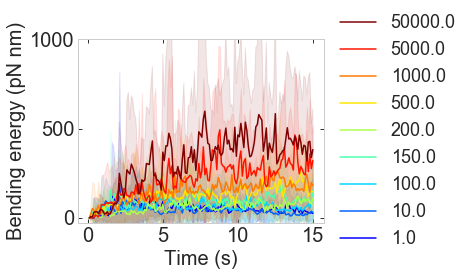

In [37]:

colors = plt.cm.jet(np.linspace(0, 1, len(solid_config_groups)+1))

fig = plt.figure(figsize=(5,4))

reverse_legend = True

commonaxis = plt.axes(frameon=True)

commonaxis.set( xlabel = 'Time (s)' )
commonaxis.set( ylabel = 'Bending energy (pN nm)' )
plot_no = 1
# plot_max = np.max(means + stds)*1000
# plot_min = np.min(means - stds)*1000

# times = mean_total_by_config_over_time.sort_values(by = ['hip1r_coverage', 't'])['t']

# means = mean_total_by_config_over_time.sort_values(by = ['hip1r_coverage', 't'])['bending_energy']
# stds  = std_total_by_config_over_time.sort_values(by = ['hip1r_coverage', 't'])['bending_energy']
# ends_grouped['radial_orientation'].mean(

times =mean_total_by_config_over_time.reset_index().time

means = mean_total_by_config_over_time
stds = std_total_by_config_over_time

values = []

ax = plt.subplot(1,1,1)
for name, group in solid_config_groups:
    
    color = colors[plot_no]
    
#     x = times.loc[name]
#     x=np.arange(0.1,)
    y = means.loc[name]
    x = y.reset_index().time
    std = stds.loc[name]

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    ax.plot(x,y,c=color)
    ax.fill_between(x,np.array(y)-np.array(std), np.array(y)+np.array(std), alpha=0.1,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) #,linestyle='dashdot'


    title = ''
    for prop, value in zip(config_groups, str(name)):
        title += prop + ' = ' + str(name) + '\n'
        
#   for arp2_area, convert to density in molecules per µm^2
    if 'arp2_area' in config_groups[0]:
        name = int(arp_nb_unique[0]/float(name))
        
    values.append(name)    

    plot_no += 1
    
#     if plot_no ==8:
#         break
    
plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)



if reverse_legend == True:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(values), loc='center left', bbox_to_anchor=(1, 0.5))

# not reversed legend:
else:
    ax.legend(values, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Time (s)')
plt.ylabel('Bending energy (pN nm)')

plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

plt.ylim([-30, 1000])

plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_bending_energy_base_vs_time_for_' +config_groups[0]+ '.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_bending_energy_base_vs_time_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")






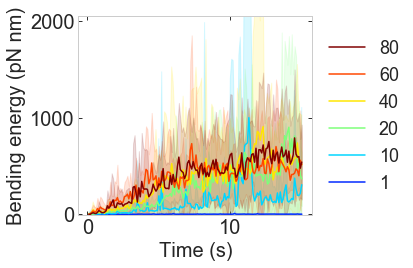

In [114]:
# all bending energy

plot_vs_time_by_parameter(mean_total_bending_by_config_over_time,std_total_bending_by_config_over_time, 'Bending energy (pN nm)', 'reverse')
plt.ylim([-10, 2050])
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Bending_energy_vs_time_for_' +config_groups[0]+ '.png',bbox_inches="tight")
    plt.savefig(working_dir+'figures/'+pref+'_Bending_energy_vs_time_for_' +config_groups[0]+ '.pdf',bbox_inches="tight")




## plot bending energy base vs parameter


In [115]:
# take last time points. time 10-15s
# idx = pd.IndexSlice
# # data_frame = filaments_near_base
# # column = 'bending_energy'
# # ff = True
# def last_timepoints(data_frame, column):
# # if ff:
#     data_frame_time_agg = data_frame.pivot_table(index=['param_sweep','run', 'time'], fill_value = 0, dropna = False, aggfunc={column:'sum'})
# #     data_frame_time_count = data_frame.pivot_table(index=['param_sweep','run', 'time'], fill_value = 0, dropna = False, aggfunc={column:'count'})
# #     data_frame_time_agg = data_frame_time_agg.sort_index(level=[0,1])


#     late_timepoints = data_frame_time_agg.loc[idx[:,:,10:15],:]
#     late_timepoints_byconfig = group_by_config_param_run(late_timepoints)
    
# #     late_timepoints_count = data_frame_time_count.loc[idx[:,:,10:15],:]
# #     late_timepoints_byconfig_count = group_by_config_param_run(late_timepoints_count)

#     late_timepoints_byconfig_mean = late_timepoints_byconfig[column].mean()
#     late_timepoints_byconfig_std  = late_timepoints_byconfig[column].std()
# #     late_timepoints_byconfig_mean = late_timepoints_byconfig[column]
# #     late_timepoints_byconfig_std  = late_timepoints_byconfig[column]
    
# #     late_timepoints_byconfig_nb   = late_timepoints
    
#     return late_timepoints_byconfig_mean, late_timepoints_byconfig_std

mean_bending_energy_near_base_last_timepoints, stdbending_energy_near_base_last_timepoints = last_timepoints(filaments_near_base, 'bending_energy')

mean_bending_energy_last_timepoints, stdbending_energy_last_timepoints  = last_timepoints(branched_actin_bound_ends_bending, 'bending_energy')


mean_bending_energy_last_timepoints.tail()
# nb_ends_by_config



hip1r_coverage
10    274.440757
20    500.294028
40    553.375467
60    478.758974
80    584.636090
Name: bending_energy, dtype: float64

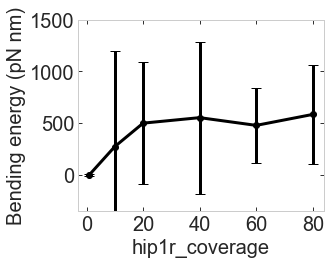

In [116]:
# bending energy overall

# bending_energy_total_param_mean, bending_energy_total_param_std = sum_energy_mean_grouped_by_run(branched_actin_bound_ends_bending, 'bending_energy')
bending_energy_total_param_mean, bending_energy_total_param_std = last_timepoints(branched_actin_bound_ends_bending, 'bending_energy')

plt.figure(figsize=[5,4])     
plot_means_by_parameter(param_list_x,bending_energy_total_param_mean, bending_energy_total_param_std,False,'Bending energy (pN nm)')

plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
plt.ylim([-350, 1500])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_total_bending_energy_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_total_bending_energy_vs_' +config_groups[0]+ '.pdf')


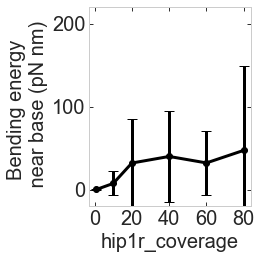

In [119]:
# plot

plt.figure(figsize=[4,4])     
plot_means_by_parameter(param_list_x,mean_bending_energy_near_base_last_timepoints, stdbending_energy_near_base_last_timepoints,False,'Bending energy \n near base (pN nm)')

plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
plt.ylim([-20, 220])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Bending_energy_near_base_last_timepoints_vs_' +config_groups[0]+ '_y200.png')
    plt.savefig(working_dir+'figures/'+pref+'_Bending_energy_near_base_last_timepoints_vs_' +config_groups[0]+ '_y200.pdf')
    



In [53]:
# polym energy = sum length from ends

workPerBinding = 13.5 #  pN nm

# max
# filament_lengths_param_mean, filament_lengths_param_std = sum_grouped_by_run(hip1r_clusters_ends_recalibrated, 'length')

# mean last time points
filament_lengths_param_mean, filament_lengths_param_std  = last_timepoints(hip1r_clusters_ends_recalibrated, 'length')


monomers_param_mean = filament_lengths_param_mean*1000/2.75
monomers_param_std  = filament_lengths_param_std*1000/2.75

polym_energy_param_mean = (monomers_param_mean-1)*workPerBinding
polym_energy_param_std  = (monomers_param_std-1)*workPerBinding

monomers_param_mean



bud_confine
1.0        3903.875201
10.0       3814.160512
100.0      4548.179372
150.0      4362.355290
200.0      4738.527175
500.0      4894.210945
1000.0     5221.896894
5000.0     5083.493855
50000.0    5347.811560
Name: length, dtype: float64

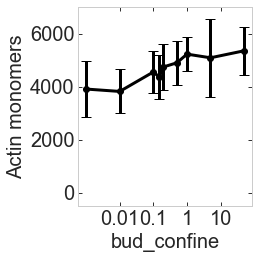

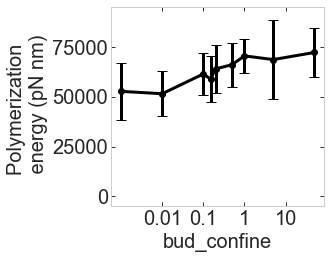

In [56]:
plt.figure(figsize=[4,4])     
plot_means_by_parameter(param_list_x,monomers_param_mean, monomers_param_std,True,'Actin monomers')

# plt.xticks([0,20,40,60,80])
plt.xticks([0.01, 0.1,1,10])
plt.ylim([-520, 7000])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Monomers_last_timepts_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_Monomers_last_timepts_vs_' +config_groups[0]+ '.pdf')
  
plt.figure(figsize=[5,4])     
plot_means_by_parameter(param_list_x,polym_energy_param_mean, polym_energy_param_std,True,'Polymerization \n energy (pN nm)')

# plt.xticks([0,20,40,60,80])
plt.xticks([0.01, 0.1,1,10])
plt.ylim([-5000, 95000])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Polym_energy_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_Polym_energy_vs_' +config_groups[0]+ '.pdf')
  

In [57]:



# data_frame = branched_actin_bound_ends_bending
# column = 'bending_energy'
# df2 = hip1r_clusters_ends_recalibrated

# data_frame_run_count_mean, polym_energy = efficiency_

def efficiency_grouped_by_run(data_frame,column, df2):
    
    
        # combine with solid to get all time points
    #     merged = pd.merge(solid_allparams, data_frame, on=['param_sweep','run','time'], how = 'right')

    data_frame_time_sum = data_frame.pivot_table(index=['param_sweep','run', 'time'], dropna = False, aggfunc={column:'sum'})
    #   grouped by run

    late_timepoints = data_frame_time_sum.loc[idx[:,:,10:15],:]
    late_timepoints_byconfig = group_by_config_param_run(late_timepoints)

    #     data_frame_run_count_mean = data_frame_time_count.pivot_table(index=['param_sweep','run'], dropna = False, aggfunc={column:'mean'})

    filament_length_time_sum = df2.pivot_table(index=['param_sweep','run', 'time'], dropna = False, aggfunc={'length':'sum'})
    #    grouped by run
    # filament_length_count_mean = filament_length_time_count.pivot_table(index=['param_sweep','run'], dropna = False, aggfunc={'length':'mean'})
    polym_energy = filament_length_time_sum*(1000/2.75)*13.75
    polym_energy_late_timepoints = polym_energy.loc[idx[:,:,10:15],:]
    polym_energy_late_timepoints_byconfig = group_by_config_param_run(late_timepoints)
    #     return data_frame_run_count_mean, polym_energy

    # efficiency_count_mean = late_timepoints[column]/polym_energy_late_timepoints['length']
    efficiency_count_mean = late_timepoints[column].divide(polym_energy_late_timepoints['length'],fill_value=None)


    #     # HERE get perecnetile ananymous function to work on pivot table.
    #     # data_frame_run_count = data_frame_time_count.pivot_table(index=['param_sweep','run'], dropna = False, aggfunc={column: np.percentile(a, q=95)})

    data_frame_max_count_grouped_mean = group_by_config_param_run(efficiency_count_mean).mean()
    data_frame_max_count_grouped_std  = group_by_config_param_run(efficiency_count_mean).std()

    return data_frame_max_count_grouped_mean, data_frame_max_count_grouped_std,efficiency_count_mean

bending_energy_efficiency_base_last_timepoints_param_mean, bending_energy_efficiency_base_last_timepoints_param_std,efficiency_count_mean = efficiency_grouped_by_run(branched_actin_bound_ends_bending, 'bending_energy', hip1r_clusters_ends_recalibrated)

# data_frame_run_count_mean, polym_energy = efficiency_mean_grouped_by_run(filaments_near_base, 'bending_energy', hip1r_clusters_ends_recalibrated)

bending_energy_efficiency_base_last_timepoints_param_mean


time         0
bud_confine                
1.0          12.5  0.011084
10.0         12.5  0.012090
100.0        12.5  0.009591
150.0        12.5  0.012849
200.0        12.5  0.010492
500.0        12.5  0.010931
1000.0       12.5  0.011511
5000.0       12.5  0.012132
50000.0      12.5  0.012943

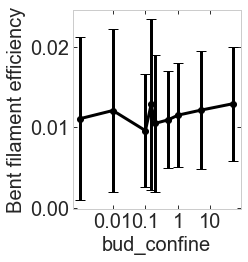

In [58]:
plt.figure(figsize=[4,4])     
plot_means_by_parameter(param_list_x,bending_energy_efficiency_base_last_timepoints_param_mean[0], bending_energy_efficiency_base_last_timepoints_param_std[0], True,'Bent filament efficiency')

# plt.xticks([0,20,40,60,80])
plt.xticks([0.01, 0.1,1,10])
# plt.ylim([-5, 7000])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Bending_efficiency_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_Bending_efficiency_vs_' +config_groups[0]+ '.pdf')
  

In [59]:
# fractino of bending energy near base

column = 'bending_energy'

# filaments near base

near_base_time_sum = filaments_near_base.pivot_table(index=['param_sweep','run', 'time'], dropna = False, aggfunc={column:'sum'})
#   grouped by run

late_timepoints_near_base = near_base_time_sum.loc[idx[:,:,10:15],:]

#     all filaments
all_filaments_time_sum = branched_actin_bound_ends_bending.pivot_table(index=['param_sweep','run', 'time'], dropna = False, aggfunc={column:'sum'})
#   grouped by run

late_timepoints_all_filaments = all_filaments_time_sum.loc[idx[:,:,10:15],:]
fraction_energy_base = late_timepoints_near_base[column].divide(late_timepoints_all_filaments[column],fill_value=None)


fraction_energy_base_grouped_mean = group_by_config_param_run(fraction_energy_base).mean()
fraction_energy_base_grouped_std  = group_by_config_param_run(fraction_energy_base).std()

fraction_energy_base_grouped_mean


time  bending_energy
bud_confine                      
1.0          12.5        0.094398
10.0         12.5        0.068251
100.0        12.5        0.126036
150.0        12.5        0.159753
200.0        12.5        0.147205
500.0        12.5        0.253045
1000.0       12.5        0.243024
5000.0       12.5        0.321578
50000.0      12.5        0.434588

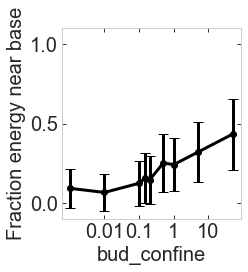

In [61]:
plt.figure(figsize=[4,4])     
plot_means_by_parameter(param_list_x,fraction_energy_base_grouped_mean.bending_energy, fraction_energy_base_grouped_std.bending_energy, True,'Fraction energy near base')

# plt.xticks([0,20,40,60,80])
plt.xticks([0.01, 0.1,1,10])
plt.ylim([-0.1, 1.1])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Fraction_bending_base_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_Fraction_bending_base_vs_' +config_groups[0]+ '.pdf')
  




In [131]:
# usually spring constant is .15 pN / nm
spring_constant = 0.150
solid_properties['internalization_energy'] = 0.5 * spring_constant * solid_properties['internalization'] * 1000 * solid_properties['internalization'] * 1000

solid_properties.tail(5)

hip1r_coverage  time  id  \
param_sweep                     run                                      
hip1r_sphere_low_tension_output run0005_0015              80  14.6   1   
                                run0005_0015              80  14.7   1   
                                run0005_0015              80  14.8   1   
                                run0005_0015              80  14.9   1   
                                run0005_0015              80  15.0   1   

                                                  xpos      ypos      zpos  \
param_sweep                     run                                          
hip1r_sphere_low_tension_output run0005_0015 -0.029088  0.023339 -0.306182   
                                run0005_0015 -0.028008  0.023766 -0.304883   
                                run0005_0015 -0.028572  0.024150 -0.304559   
                                run0005_0015 -0.028868  0.022788 -0.303601   
                                run0005_0015 -0.028220  0.021687 -0.303330   

                                              internalization  \
param_sweep                     run                             
hip1r_sphere_low_tension_output run0005_0015         0.093818   
                                run0005_0015         0.095117   
                                run0005_0015         0.095441   
                                run0005_0015         0.096399   
                                run0005_0015         0.096670   

                                              internalization_mean  \
param_sweep                     run                                  
hip1r_sphere_low_tension_output run0005_0015              0.048597   
                                run0005_0015              0.048597   
                                run0005_0015              0.048597   
                                run0005_0015              0.048597   
                                run0005_0015              0.048597   

                                              internalization_95thpercentile  \
param_sweep                     run                                            
hip1r_sphere_low_tension_output run0005_0015                        0.092995   
                                run0005_0015                        0.092995   
                                run0005_0015                        0.092995   
                                run0005_0015                        0.092995   
                                run0005_0015                        0.092995   

                                              internalization_mean_to_set_time  \
param_sweep                     run                                              
hip1r_sphere_low_tension_output run0005_0015                          0.038022   
                                run0005_0015                          0.038022   
                                run0005_0015                          0.038022   
                                run0005_0015                          0.038022   
                                run0005_0015                          0.038022   

                                              internalization_95thpercentile_to_set_time  \
param_sweep                     run                                                        
hip1r_sphere_low_tension_output run0005_0015                                    0.081143   
                                run0005_0015                                    0.081143   
                                run0005_0015                                    0.081143   
                                run0005_0015                                    0.081143   
                                run0005_0015                                    0.081143   

                                              internalization_energy  
param_sweep                     run                                   
hip1r_sphere_low_tension_output run0005_0015              660.136284  
                                run0005

In [66]:
# calculate internlization energy in pN nm

# when varying spring constant

# 1/2kx^2
# k pN/ µm
# x µm
# solid_properties['internalization_energy'] = 0.5 * solid_properties['bud_confine'] * solid_properties['internalization'] * 1000 * solid_properties['internalization'] * 1000

# 1/2kx^2
# k pN/ µm to nm
# x µm
solid_properties['internalization_energy'] = 0.5 * solid_properties['bud_confine'] /1000 * solid_properties['internalization'] * 1000 * solid_properties['internalization'] *1000




In [67]:
solid_properties.head(20)

bud_confine  time  id      xpos  \
param_sweep                  run                                             
vary_spring_stiffness_output run0000_0000          1.0   0.1   1  0.001287   
                             run0000_0000          1.0   0.2   1  0.001161   
                             run0000_0000          1.0   0.3   1  0.000847   
                             run0000_0000          1.0   0.4   1  0.000175   
                             run0000_0000          1.0   0.5   1 -0.001159   
                             run0000_0000          1.0   0.6   1 -0.000012   
                             run0000_0000          1.0   0.7   1  0.000175   
                             run0000_0000          1.0   0.8   1 -0.001287   
                             run0000_0000          1.0   0.9   1 -0.004225   
                             run0000_0000          1.0   1.0   1 -0.003413   
                             run0000_0000          1.0   1.1   1 -0.003272   
                             run0000_0000          1.0   1.2   1 -0.002093   
                             run0000_0000          1.0   1.3   1 -0.001570   
                             run0000_0000          1.0   1.4   1 -0.004197   
                             run0000_0000          1.0   1.5   1 -0.005449   
                             run0000_0000          1.0   1.6   1 -0.005680   
                             run0000_0000          1.0   1.7   1 -0.007828   
                             run0000_0000          1.0   1.8   1 -0.009343   
                             run0000_0000          1.0   1.9   1 -0.009825   
                             run0000_0000          1.0   2.0   1 -0.005874   

                                               ypos      zpos  \
param_sweep                  run                                
vary_spring_stiffness_output run0000_0000  0.002339 -0.398798   
                             run0000_0000  0.001509 -0.399887   
                             run0000_0000  0.001685 -0.399869   
                             run0000_0000  0.002959 -0.396442   
                             run0000_0000  0.002663 -0.391402   
                             run0000_0000  0.004316 -0.390670   
                             run0000_0000  0.004400 -0.391092   
                             run0000_0000  0.001691 -0.390358   
                             run0000_0000  0.003167 -0.389972   
                             run0000_0000  0.003225 -0.388518   
                             run0000_0000  0.001787 -0.385599   
                             run0000_0000  0.002688 -0.387231   
                             run0000_0000  0.003262 -0.385823   
                             run0000_0000  0.002559 -0.383943   
                             run0000_0000  0.002951 -0.382058   
                             run0000_0000  0.001955 -0.380325   
                             run0000_0000  0.001683 -0.377934   
                             run0000_0000  0.000702 -0.374717   
                             run0000_0000  0.000252 -0.373362   
                             run0000_0000 -0.001383 -0.373277   

                                           internalization  \
param_sweep                  run                             
vary_spring_stiffness_output run0000_0000         0.001202   
                             run0000_0000         0.000113   
                             run0000_0000         0.000131   
                             run0000_0000         0.003558   
                             run0000_0000         0.008598   
                             run0000_0000         0.009330   
                             run0000_0000         0.008908   
                             run0000_0000         0.009642   
                             run0000_0000         0.010028   
                             run0000_0000         0.011482   
                             run0000_0000         0.014401   
                             run0000_0000         0.012769   
                           

In [68]:
intern_energy_efficiency_param_mean, intern_energy_efficiency_param_std, efficiency_count_mean = efficiency_grouped_by_run(solid_properties, 'internalization_energy', hip1r_clusters_ends_recalibrated)
intern_energy_efficiency_param_mean


time         0
bud_confine                
1.0          12.5  0.000080
10.0         12.5  0.000707
100.0        12.5  0.003551
150.0        12.5  0.004251
200.0        12.5  0.003284
500.0        12.5  0.005322
1000.0       12.5  0.006466
5000.0       12.5  0.007364
50000.0      12.5  0.013566

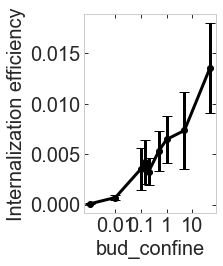

In [70]:
plt.figure(figsize=[3.5,4])     
plot_means_by_parameter(param_list_x, intern_energy_efficiency_param_mean[0], intern_energy_efficiency_param_std[0], True,'Internalization efficiency')

# plt.xticks([0,20,40,60,80])
plt.xticks([0.01, 0.1,1,10])
# plt.ylim([-5, 7000])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Intern_efficiency_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_Intern_efficiency_vs_' +config_groups[0]+ '.pdf')
    
    

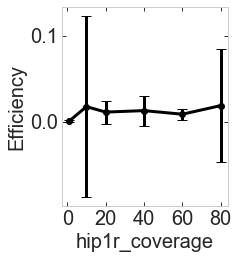

In [134]:


plt.figure(figsize=[4,4])     
plot_means_by_parameter(param_list_x,bending_energy_efficiency_base_last_timepoints_param_mean[0], bending_energy_efficiency_base_last_timepoints_param_std[0], False,'Efficiency')

plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
# plt.ylim([-5, 7000])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Efficiency_vs_' +config_groups[0]+ '.png')
    plt.savefig(working_dir+'figures/'+pref+'_Efficiency_vs_' +config_groups[0]+ '.pdf')
  

In [135]:
# save what you need for multi-parameter sweep plotting.
# ssssss
solid_properties.to_pickle(save_dir+pref+config_groups[0]+'_solid_propertiess.pkl') 
branched_actin_bound_ends_bending.to_pickle(save_dir+pref+config_groups[0]+'_branched_actin_bound_ends_bending.pkl') 
hip1r_clusters_ends_recalibrated.to_pickle(save_dir+pref+config_groups[0]+'_hip1r_clusters_ends_recalibrated.pkl') 
filaments_near_base.to_pickle(save_dir+pref+config_groups[0]+'_filaments_near_base.pkl') 
final_bound_hip1r_allparams.to_pickle(save_dir+pref+config_groups[0]+'_final_bound_hip1r_allparams.pkl') 
# hip1r_clusters_arp
associated_arp_allparams.to_pickle(save_dir+pref+config_groups[0]+'_associated_arp_allparams.pkl') 

print('saved processed dataframes.')



saved processed dataframes.


In [136]:
print('got to the end! ')

got to the end! 


## param sweep as 2D contour plot

In [ ]:
solid_to_max_time = solid_properties.loc[lambda solid_properties: solid_properties['time']<=maxTime]

mean_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].mean()
std_interns_95_by_parameter  = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].std()
# count of number time points that have a value for 'internalization_95thpercentile_to_set_time', divided by number time points
nb_runs_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].count()/(maxTime/timestep)

plt.set_cmap('jet')

plt.figure(figsize=(5.5,4))

xaxis_log = True
yaxis_log = True

# def log_10_product(x, pos):
#     """The two args are the value and tick position.
#     Label ticks with the product of the exponentiation"""
#     return '%1i' % (x)

# def log_10_product_decimal(x, pos):
#     """The two args are the value and tick position.
#     Label ticks with the product of the exponentiation"""
# #     for decimal value not integer shown
#     return '%.4f' % (x)

# Axis scale must be set prior to declaring the Formatter
# If it is not the Formatter will use the default log labels for ticks.
ax = plt.subplot(111)


if xaxis_log == True:
    ax.set_xscale('log')

    formatter = plt.FuncFormatter(log_10_product)
    ax.xaxis.set_major_formatter(formatter)


if yaxis_log == True:
    ax.set_yscale('log')

    formatter = plt.FuncFormatter(log_10_product)
    ax.yaxis.set_major_formatter(formatter)



plt.rc('font', size=12)          # controls default text sizes

# x and y are params 

x = param_list_x
# y = param_list_y
#  convert um to nm
y = np.divide(param_list_y,1000)
# % This should return the internalization in an order of X Y (param 1 param2). but check that.

color=mean_interns_95_by_parameter.unstack(level=0)*1000

plt.contour(x,y,color, 7, colors='black')
plt.contourf(x,y,color, 7)

# plt.colorbar(label = 'Internalization 95th percentile (nm)')

cbar = plt.colorbar(label = '95% internalization (nm)')
plt.clim([0, 105])
cbar.set_ticks([0, 20, 40, 60, 80, 100])

plt.xlabel(names[0])
plt.ylabel(names[1])
# plt.title('Internalization versus 2 params')

# plt.xlim(right = 80)
# plt.ylim(top = 0)

# set scale as log or not!

# plt.xscale('log')
# plt.yscale('log')
plt.xlim([0.1, 10])
# colorbar range

# full range
# plt.clim(np.nanmin(bin_means), np.nanmax(bin_means))

# selected range colors
# plt.clim([0, 100])

# plt.rc('xtick', labelsize=14) 
# plt.rc('ytick', labelsize=14) 


plt.tight_layout()
# plt.savefig('figures/2Dparams_contour.png')
if save_figures:
    plt.savefig(working_dir+'figures/'+pref+'internalization95_vs_'+names[0]+'_and_'+names[1]+'_contour.png')
    plt.savefig(working_dir+'figures/'+pref+'internalization95_vs_'+names[0]+'_and_'+names[1]+'_contour.pdf')






In [ ]:
solid_to_max_time = solid_properties.loc[lambda solid_properties: solid_properties['time']<=maxTime]

mean_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].mean()
std_interns_95_by_parameter  = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].std()
# count of number time points that have a value for 'internalization_95thpercentile_to_set_time', divided by number time points
nb_runs_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].count()/(maxTime/timestep)

plt.figure(figsize=(5,4))

xaxis_log = True
yaxis_log = True

# def log_10_product(x, pos):
#     """The two args are the value and tick position.
#     Label ticks with the product of the exponentiation"""
#     return '%1i' % (x)

# Axis scale must be set prior to declaring the Formatter
# If it is not the Formatter will use the default log labels for ticks.
ax = plt.subplot(111)


if xaxis_log == True:
    ax.set_xscale('log')

    formatter = plt.FuncFormatter(log_10_product)
    ax.xaxis.set_major_formatter(formatter)


if yaxis_log == True:
    ax.set_yscale('log')

    formatter = plt.FuncFormatter(log_10_product)
    ax.yaxis.set_major_formatter(formatter)

plt.set_cmap('inferno')
# plt.cm.get_cmap('plasma')
# plt.cm.get_cmap('inferno')
# plt.cm.get_cmap('magma')


# plt.cm.get_cmap('cool')

# plt.set_cmap('jet')

plt.rc('font', size=12)          # controls default text sizes

# x and y are params 

x = param_list_x
y = param_list_y

# % This should return the internalization in an order of X Y (param 1 param2). but check that.

color=mean_interns_95_by_parameter.unstack(level=0)*1000

# bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
#   bins=30, statistic='mean', range = [[0,10],[0, 500]])
# bin_means = np.flipud(np.rot90(bin_means))

# plt.pcolormesh(xedges, yedges, bin_means)

plt.pcolormesh(x,y,color)

# plt.contour(x,y,color,8, colors='black')
# plt.contourf(x,y,color, 8)

# plt.colorbar(label = 'Internalization 95th percentile (nm)')

cbar = plt.colorbar(label = '95% internalization (nm)')
plt.clim([0, 105])
cbar.set_ticks([0, 25, 50, 75, 100])

plt.xlabel(names[0])
plt.ylabel(names[1])

plt.xlim([0.1, 10])
# plt.title('Internalization versus 2 params')

# plt.xlim(right = 80)
# plt.ylim(top = 0)

# set scale as log or not!

# plt.xscale('log')
# plt.yscale('log')
# colorbar range

# full range
# plt.clim(np.nanmin(bin_means), np.nanmax(bin_means))

# selected range colors
# plt.clim([0, 100])

# plt.rc('xtick', labelsize=14) 
# plt.rc('ytick', labelsize=14) 


plt.tight_layout()
# # plt.savefig('figures/2Dparams_contour.png')
if save_figures:
    plt.savefig(working_dir+'figures/'+pref+'internalization95_heat_map_vs_'+names[0]+'_and_'+names[1]+'_contour.png')
    plt.savefig(working_dir+'figures/'+pref+'internalization95_heat_map_vs_'+names[0]+'_and_'+names[1]+'_contour.pdf')






## plot ALL parameters mean and std internalization (negative) over time

In [ ]:
# calculate mean and std internalization for ALL tracks loaded

mean_internalization_all=-(solid_properties.groupby('time').mean().internalization)*1000
std_internalization_all =-(solid_properties.groupby('time').std().internalization)*1000
# times = solid_properties['time']

times = np.unique(solid_properties['time'])


# plot negative internalization over time

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
# plt.errorbar(times,mean_internalization_all,std_internalization_all)

# plt.tick_params(axis='both', direction='inout')
plt.tick_params(reset=True, color='black', direction='in', length=4)


# shaded bar HERE
color = 'black'
plt.plot(times,mean_internalization_all,c=color)
plt.fill_between(times,np.array(mean_internalization_all)-np.array(std_internalization_all), np.array(mean_internalization_all)+np.array(std_internalization_all), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) #,linestyle='dashdot'



plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Internalization (nm)', fontsize=24)

plt.grid(False)
# plt.gca().tick_params(axis='both', direction='inout', which='major')
# plt.majorticks_on()
plt.tight_layout()




if save_figures == 'yes': 
    plt.savefig(working_dir+'figures/'+pref+'_internalization-vs-time_errorbar.png')
    plt.savefig(working_dir+'figures/'+pref+'_internalization-vs-time_errorbar.pdf')



